## #MILESTONE 1

#DATA CLEANING, PREPARATION, AND COMMUNICATION base on Card Table

#CARD TABLE

In [ ]:
import pandas as pd

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1i0GuMSd75a0Y5ENaYVB1krchy_RU65i6/edit?usp=drive_link&ouid=103913184998663485520&rtpof=true&sd=true'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
df_card = pd.read_csv(potter)
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,04/2030,866,Rp53.189.000,01/1996,2019,17,181.0,Rp177.057.300,NaN,NaN
1,1,550,Mastercard,5278231764792292,06/2030,396,Rp18.200.000,01/1999,2018,27,148.0,Rp135.687.100,NaN,NaN
2,2,556,Mastercard,5889825928297675,09/2027,422,Rp31.298.000,01/2000,2016,20,415.0,Rp186.723.300,NaN,NaN
3,3,1937,Visa,4289888672554714,04/2026,736,Rp25.732.000,01/2000,2020,7,148.0,Rp207.881.500,NaN,NaN
4,4,1981,Mastercard,5433366978583845,03/2030,530,Rp30.500.000,01/2002,2012,14,48.0,Rp28.007.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,4508,1190,Visa,4227482000380763,07/2028,795,Rp7.301.000,09/2005,2012,5,320.0,Rp196.255.900,NaN,NaN
5595,209,1334,Visa,4144931322114018,02/2029,312,Rp14.592.000,01/2014,2014,32,41.0,Rp51.009.700,NaN,NaN
5596,2711,185,Visa,4718517475996018,01/2027,492,Rp8.943.000,04/2017,2017,14,198.0,Rp89.850.000,NaN,NaN
5597,1161,1891,Visa,4268017872699469,08/2031,476,Rp23.891.000,02/2013,2020,12,96.0,Rp43.768.500,NaN,NaN


###Question 4a Convert the correct data type in the “card” table dataset

In [ ]:
df_card.dtypes

,0
id,int64
client_id,int64
card_brand,object
card_number,int64
expires,object
cvv,int64
credit_limit,object
acct_open_date,object
year_pin_last_changed,int64
days_since_last_trx,int64


####4a.1. Convert the data types (client_id and id) from interger to object/string

In [ ]:
df_card['client_id'] = df_card['client_id'].astype(str)
df_card['id'] = df_card['id'].astype(str)
print(df_card[['client_id', 'id']].dtypes)

client_id    object
id           object
dtype: object


####4a.2. Change all count data types (count_nonfraud_trx_L6M and count_fraud_trx_L6M) from float to interger

In [ ]:
df_card['count_nonfraud_trx_L6M'] = df_card['count_nonfraud_trx_L6M'].fillna(0).astype(int)
df_card['count_fraud_trx_L6M'] = df_card['count_fraud_trx_L6M'].fillna(0).astype(int)
print(df_card[['count_nonfraud_trx_L6M', 'count_fraud_trx_L6M']].dtypes)

count_nonfraud_trx_L6M    int64
count_fraud_trx_L6M       int64
dtype: object


####4a.3. Change data related to money (credit_limit, amt_nonfraud_trx_L6M, amt_fraud_trx_L6M) from object to float

In [ ]:
df_card['credit_limit'] = df_card['credit_limit'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).astype(float)
df_card['amt_nonfraud_trx_L6M'] = df_card['amt_nonfraud_trx_L6M'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).astype(float)
df_card['amt_fraud_trx_L6M'] = df_card['amt_fraud_trx_L6M'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).fillna('0').astype(float)

In [ ]:
df_card.dtypes

,0
id,object
client_id,object
card_brand,object
card_number,int64
expires,object
cvv,int64
credit_limit,float64
acct_open_date,object
year_pin_last_changed,int64
days_since_last_trx,int64


####4a.4. Change all the datetime data (expires and acct_open_date) from object to timeseries

In [ ]:
df_card['expires'] = pd.to_datetime(df_card['expires'], format='%m/%Y')
df_card['acct_open_date'] = pd.to_datetime(df_card['acct_open_date'], format='%m/%Y')

print(df_card[['expires', 'acct_open_date']].dtypes)

expires           datetime64[ns]
acct_open_date    datetime64[ns]
dtype: object


###Question 4b Check the unique values in each column and see some typo data that either needs to be fixed or excluded (use value_counts())


Use check by function .value_counts() on column
Notes:
1.Primary key harus unik untuk tiap record, tidak boleh duplikat
2.Satu user bisa punya banyak kartu, duplikat diizinkan.
3.Atribut deskriptif, banyak kartu bisa sama merek, tp perlu diperhatikan ttg adanya typo di bagian card_brand Visa dan JCB
4.Nomor identitas kartu, harus unik per kartu.
5.Tanggal kadaluarsa bisa sama antar kartu.
6.CVV terkait kartu, tidak perlu indeks unik sendiri karena card_number sudah unik.
7.Tanggal pembukaan akun bisa sama.
8.Riwayat PIN, tidak unik.

####4b.1.Handling typos in the card_brand column, particularly for entries such as Visa and JCB, to ensure consistent spelling and avoid duplicate categories caused by misspellings or typo.

In [ ]:
df_card['card_brand'].value_counts()

,count
card_brand,
Mastercard,2826
Visa,2093
Amex,402
JCB,206
Visa,69
Jcb,3


In [ ]:
df_card['card_brand'] = df_card['card_brand'].replace({'Visa ': 'Visa', 'Jcb': 'JCB'})
df_card['card_brand'].value_counts()

,count
card_brand,
Mastercard,2826
Visa,2162
Amex,402
JCB,209


####4b.2.  As both id serve as unique identifiers within the dataset, ensuring that they contain no duplicate values is essential.The steps focus on correcting any inconsistencies or duplicates found in these columns.

In [ ]:
df_card.drop_duplicates(keep='first', subset=['id'], inplace=True)

In [ ]:
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,2030-04-01,866,53189000.0,1996-01-01,2019,17,181,177057300.0,0,NaN
1,1,550,Mastercard,5278231764792292,2030-06-01,396,18200000.0,1999-01-01,2018,27,148,135687100.0,0,NaN
2,2,556,Mastercard,5889825928297675,2027-09-01,422,31298000.0,2000-01-01,2016,20,415,186723300.0,0,NaN
3,3,1937,Visa,4289888672554714,2026-04-01,736,25732000.0,2000-01-01,2020,7,148,207881500.0,0,NaN
4,4,1981,Mastercard,5433366978583845,2030-03-01,530,30500000.0,2002-01-01,2012,14,48,28007500.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,6141,715,Mastercard,5369522792349411,2028-08-01,597,57378000.0,2022-08-01,2024,604,0,NaN,0,NaN
5564,6142,1236,Mastercard,5791756986936871,2030-11-01,196,19178000.0,2024-12-01,2024,604,0,NaN,0,NaN
5565,6143,253,Mastercard,5482273460029161,2030-07-01,79,38739000.0,2024-12-01,2024,604,0,NaN,0,NaN
5566,6144,737,Mastercard,5413710543564908,2030-10-01,454,10355000.0,2024-12-01,2024,604,0,NaN,0,NaN


####4b.3. Same as id, card_number serve as unique identifiers too, ensuring again that they contain no duplicate values. The steps still focus on correcting any inconsistencies or duplicates in these columns.

In [ ]:
df_card.drop_duplicates(keep='first', subset=['card_number'], inplace=True)

In [ ]:
df_card

,id,client_id,card_brand,card_number,expires,cvv,credit_limit,acct_open_date,year_pin_last_changed,days_since_last_trx,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
0,0,1362,Amex,393314135668401,2030-04-01,866,53189000.0,1996-01-01,2019,17,181,177057300.0,0,NaN
1,1,550,Mastercard,5278231764792292,2030-06-01,396,18200000.0,1999-01-01,2018,27,148,135687100.0,0,NaN
2,2,556,Mastercard,5889825928297675,2027-09-01,422,31298000.0,2000-01-01,2016,20,415,186723300.0,0,NaN
3,3,1937,Visa,4289888672554714,2026-04-01,736,25732000.0,2000-01-01,2020,7,148,207881500.0,0,NaN
4,4,1981,Mastercard,5433366978583845,2030-03-01,530,30500000.0,2002-01-01,2012,14,48,28007500.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,6141,715,Mastercard,5369522792349411,2028-08-01,597,57378000.0,2022-08-01,2024,604,0,NaN,0,NaN
5564,6142,1236,Mastercard,5791756986936871,2030-11-01,196,19178000.0,2024-12-01,2024,604,0,NaN,0,NaN
5565,6143,253,Mastercard,5482273460029161,2030-07-01,79,38739000.0,2024-12-01,2024,604,0,NaN,0,NaN
5566,6144,737,Mastercard,5413710543564908,2030-10-01,454,10355000.0,2024-12-01,2024,604,0,NaN,0,NaN


###Question 4c Check Missing Value

In [ ]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5568 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5568 non-null   object        
 1   client_id               5568 non-null   object        
 2   card_brand              5568 non-null   object        
 3   card_number             5568 non-null   int64         
 4   expires                 5568 non-null   datetime64[ns]
 5   cvv                     5568 non-null   int64         
 6   credit_limit            5556 non-null   float64       
 7   acct_open_date          5568 non-null   datetime64[ns]
 8   year_pin_last_changed   5568 non-null   int64         
 9   days_since_last_trx     5568 non-null   int64         
 10  count_nonfraud_trx_L6M  5568 non-null   int64         
 11  amt_nonfraud_trx_L6M    3684 non-null   float64       
 12  count_fraud_trx_L6M     5568 non-null   int64        

In [ ]:
df_card.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,12
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


####4c.1. Filling missing value in credit_limit column

Cause the proportion of missing values in credit_limit is relatively small (12 out of 5599 entries), we can filling missing values with the median helps maintain the natural structure of the dataset without introducing artificial inflation or deflation in the credit limit values and median imputation is easy to implement and doesn’t require complex assumptions about the data distribution.

In [ ]:
median_credit_limit = df_card['credit_limit'].median()
df_card['credit_limit'] = df_card['credit_limit'].fillna(median_credit_limit)

In [ ]:
df_card.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_number,0
expires,0
cvv,0
credit_limit,0
acct_open_date,0
year_pin_last_changed,0
days_since_last_trx,0


###Question 4d Based on the card expiry date, remove all cards that have already expired and also exclude cards with a credit limit 0 (data calculated as May 31, 2025)

condition 1 >> remove all cards that have already expired by May 31, 2025
condition 2 >> exclude cards with credit_limit of 0,
Define reference date as May 31, 2025 for  checking card expiry to determine which cards are still valid (create a datetime object for May 31, 2025 as referance_date)

In [ ]:
reference_date = pd.to_datetime('2025-05-31')
print(f"Reference Date: {reference_date}")

Reference Date: 2025-05-31 00:00:00


In [ ]:
df_card_filtered = df_card[(df_card['expires'] >= reference_date) & (df_card['credit_limit'] > 0)]
print("First  5 rows of the filtered DataFrame:")
print(df_card_filtered.head())
print(f"\nShape of the filtered DataFrame: {df_card_filtered.shape}")

First  5 rows of the filtered DataFrame:
  id client_id  card_brand       card_number    expires  cvv  credit_limit  \
0  0      1362        Amex   393314135668401 2030-04-01  866    53189000.0   
1  1       550  Mastercard  5278231764792292 2030-06-01  396    18200000.0   
2  2       556  Mastercard  5889825928297675 2027-09-01  422    31298000.0   
3  3      1937        Visa  4289888672554714 2026-04-01  736    25732000.0   
4  4      1981  Mastercard  5433366978583845 2030-03-01  530    30500000.0   

  acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     1996-01-01                   2019                   17   
1     1999-01-01                   2018                   27   
2     2000-01-01                   2016                   20   
3     2000-01-01                   2020                    7   
4     2002-01-01                   2012                   14   

   count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181        

**Before Filtering (Original Data Condition) :** The dataset contained all 5599 card records, including :
1.Cards that were already expired before May 31, 2025.
2.Cards with a credit limit of 0, meaning they were not usable for credit transactions.
**After Filtering (Cleaned Data Condition) :**
1.Only cards that expire on or after May 31, 2025 were kept.
2.Cards with credit_limit > 0 were retained.
3.The resulting dataset contains only valid, active, financially usable cards.



#DATA CLEANING, PREPARATION, AND COMMUNICATION base on User Table

#USER TABLE

In [ ]:
potter_url = 'https://docs.google.com/spreadsheets/d/1gXUl5g_jc6krDc8l8THEih7tkmSTh5fQ/edit?usp=drive_link&ouid=103913184998663485520&rtpof=true&sd=true'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
df_user = pd.read_csv(potter, encoding='latin1')
df_user

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score
0,825,66,1972-11-25,Female,Rp45.937.000,Rp93.663.000,Rp38.138.095,787
1,1746,68,1972-12-16,Female,Rp59.451.000,Rp121.212.000,Rp57.186.095,701
2,1718,67,1944-11-04,Female,Rp35.586.000,Rp52.535.000,Rp58.666,698
3,708,63,1963-01-12,Female,Rp255.975.000,Rp392.132.000,Rp60.467.238,722
4,1164,70,1982-09-21,Male,Rp84.407.000,Rp172.099.000,Rp54.946.285,675
...,...,...,...,...,...,...,...,...
1995,986,70,1993-07-06,Male,Rp36.950.000,Rp75.328.000,Rp26.250.666,703
1996,1944,65,1963-11-12,Female,Rp37.998.000,Rp77.474.000,Rp31.224.571,740
1997,185,67,1979-01-30,Female,Rp23.810.000,Rp48.548.000,Rp21.238.666,779
1998,1007,60,1960-02-23,Male,Rp39.752.000,Rp85.752.000,Rp8.141.142,618


###Question 5a.1 Convert the correct data type in the “user” table dataset



#### # #5a.1.a Change the data types "id" from int64 to object

In [ ]:
df_user.dtypes

,0
id,int64
retirement_age,int64
birthdate,object
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


In [ ]:
df_user['id'] = df_user['id'].astype(str)

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,object
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


#### # #5a.1.b. Change the data types "birthdate" from int64 to object


In [ ]:
df_user['birthdate'] = pd.to_datetime(df_user['birthdate'], format='%Y-%m-%d')

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,datetime64[ns]
gender,object
per_capita_income,object
yearly_income,object
total_debt,object
credit_score,int64


#### # #5a.1.c.  Change the data types ("per_capita_income", "yearly_income" and "total_debt") from object to float


In [ ]:
df_user['per_capita_income'] = df_user['per_capita_income'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)
df_user['yearly_income'] = df_user['yearly_income'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)
df_user['total_debt'] = df_user['total_debt'].str.replace('Rp', '').str.replace('.', '', regex=False).astype(float)

In [ ]:
df_user.dtypes

,0
id,object
retirement_age,int64
birthdate,datetime64[ns]
gender,object
per_capita_income,float64
yearly_income,float64
total_debt,float64
credit_score,int64


####5a.2. Check the unique values in each column and see some typo data that either needs to be fixed or excluded (use value_counts())


In [ ]:
df_user.columns

Index(['id', 'retirement_age', 'birthdate', 'gender', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score'],
      dtype='object')

Based on the information provided in the data dictionary, we can conclude the following :
1. **The id column** is a row identifier and serves as the Primary Key, meaning it must not contain any null values or duplicates.
2. The retirement_age column is a profile attribute, not an identifier.
3. The birthdate column will naturally contain many duplicate values because multiple individuals can be born on the same date.
4. **The gender column** is a demographic attribute, so duplicates are allowed however, potential typos or inconsistent labels should be checked
5. The per_capita_income, yearly_income, and total_debt columns represent financial values and are not identifiers, so duplicates are acceptable.
6. The credit_score column represents a scoring metric, and it is normal for different users to have the same score.


In [ ]:
df_user['id'].value_counts()

,count
id,
1528,1
1735,1
1284,1
1805,1
1616,1
...,...
1164,1
708,1
1718,1


1. All IDs Are Unique
Each value in the id column appears exactly once (count = 1), confirming that all 2000 rows have distinct identifiers. This validates that the id column functions as a proper Primary Key.
2. No Duplicates or Nulls. There are no duplicate or missing values in the id column, indicating strong data integrity. This ensures reliable operations for indexing, joining tables, or tracking user level behavior.
3. Well structured dataset
With unique IDs, we can be confident that each row represents a single user entity, eliminating risks of double-counting or incorrect data merges.


In [ ]:
df_user['gender'].value_counts()

,count
gender,
Female,1016
Male,984


No Missing or Unexpected Values
Only two categories are present : "Female" and "Male". There are no null values or unexpected entries like "Unknown", "Other", or typos.. This indicates good data quality for the gender column, since the gender distribution is balanced, demographic analysis (example transaction behavior, fraud risk, or product preferences by gender) can be conducted without bias toward one group.

####5a.3. cek missing value

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 125.1+ KB


1. No Missing Values
All columns contain 2000 non null entries, indicating that the dataset is complete and does not require any imputation or initial cleaning.
2. Appropriate Data Types
a. birthdate is correctly stored as datetime64[ns], making it suitable for age calculations and time based segmentation.
b. Financial columns like per_capita_income, yearly_income, and total_debt are in float64 format, ready for aggregation and analysis.
c. credit_score and retirement_age are in int64, appropriate for numerical modeling and classification.

###Question 5b Add age, retired flag and DTI (debt to income ratio) column by using logics

####5b.1 Add "Age" column by logics user's age from their "birthdate" until the analysis cutoff date as 31 May 2025

In [ ]:
analysis_cutoff_date = pd.to_datetime('2025-05-31')
df_user['age'] = (analysis_cutoff_date - df_user['birthdate']).dt.days / 365.25
df_user['age'] = df_user['age'].astype(int)
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42


####5b.2 Add "retired_flag" column by logics users whose "age" is not less than the "retirement_age" (to create the column use .loc method or simpler using "np.where")

In [ ]:
import numpy as np
df_user['retired_flag'] = np.where(df_user['age'] >= df_user['retirement_age'], 1, 0)
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0


####5b.3 Add "DTI" (debt-to-income-ratio) column by logics the ratio between "total debt" and "yearly_income" as total income.

In [ ]:
df_user['DTI'] = df_user['total_debt'] / df_user['yearly_income']
display(df_user.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271


####Verify the new features added to the user table dataset
Display the first few rows of 'df_user' to inspect the newly added 'age', 'retired_flag', and 'DTI' columns, and check the DataFrame's information to confirm their data types. To verify the new features, need to display the head of the 'df_user' DataFrame to visually inspect the new columns and then use '.info()' to confirm their data types, as specified in the instructions.


In [ ]:
print("First 5 rows of df_user with new features:")
display(df_user.head())

print("\nDataFrame information with new features:")
df_user.info()

First 5 rows of df_user with new features:


,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271



DataFrame information with new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   age                2000 non-null   int64         
 9   retired_flag       2000 non-null   int64         
 10  DTI                2000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 172.0+ KB


#MILESTONE 2

###Question 6a Calculate the total net profit from all transaction in the last 6 months (Hint: net profit means all MDR fee profit minus all fraud amount. Calculate MDR fee profit by multiplying the MDR fee rate and total sales amount. Then, substract total fraud amount from that result)

Set a default MDR (Merchant Discount Rate) fee rate, for instance, 1.5% for the calculation. This rate will be used to determine the MDR fee profit from non-fraudulent transactions.


In [ ]:
mdr_fee_rate = 0.015
print(f"MDR Fee Rate set to: {mdr_fee_rate*100}%")

MDR Fee Rate set to: 1.5%


In [ ]:
total_nonfraud_sales = df_card_filtered['amt_nonfraud_trx_L6M'].fillna(0).sum()
print(f"Total non-fraudulent sales in last 6 months: {total_nonfraud_sales}")

Total non-fraudulent sales in last 6 months: 455863486600.0


In [ ]:
mdr_fee_profit = total_nonfraud_sales * mdr_fee_rate
print(f"MDR Fee Profit: {mdr_fee_profit}")

MDR Fee Profit: 6837952299.0


In [ ]:
df_card_filtered['amt_fraud_trx_L6M'] = pd.to_numeric(df_card_filtered['amt_fraud_trx_L6M'], errors='coerce').fillna(0)
total_fraud_amount = df_card_filtered['amt_fraud_trx_L6M'].sum()
print(f"Total fraud amount in last 6 months: {total_fraud_amount}")

Total fraud amount in last 6 months: 1013378300.0


/tmp/ipython-input-1493433811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_card_filtered['amt_fraud_trx_L6M'] = pd.to_numeric(df_card_filtered['amt_fraud_trx_L6M'], errors='coerce').fillna(0)


In [ ]:
net_profit = mdr_fee_profit - total_fraud_amount
print(f"Total Net Profit in last 6 months: {net_profit}")

Total Net Profit in last 6 months: 5824573999.0


In [ ]:
print(f"The total net profit from all transactions in the last 6 months is: {net_profit}")

The total net profit from all transactions in the last 6 months is: 5824573999.0


The total net profit from all transactions in the last 6 months is 5,824,573,999.0

*   The MDR (Merchant Discount Rate) fee was set at 1.5%.
*   The total non-fraudulent sales in the last 6 months amounted to 455,863,486,600.0
*   The calculated MDR fee profit was 6,837,952,299.0
*   The total fraudulent amount recorded for the last 6 months was 1,013,378,300.0
*   The final net profit, after subtracting fraud from MDR fee profit, was 5,824,573,999.0


###Question 6b Calculate the fraud rate of RevoBank. Fraud rate is the percentage of fraud amount from overall transaction volume (Hint: Calculate total fraud and nonfraud amount, and divide total fraud by total all amounts to get the fraud rate), use pie chart to visualise the result)

In [ ]:
total_transaction_volume = total_fraud_amount + total_nonfraud_sales
print(f"Overall transaction volume in last 6 months: {total_transaction_volume}")

Overall transaction volume in last 6 months: 456876864900.0


In [ ]:
fraud_rate = (total_fraud_amount / total_transaction_volume) * 100
print(f"Fraud rate of RevoBank in last 6 months: {fraud_rate:.2f}%")

Fraud rate of RevoBank in last 6 months: 0.22%


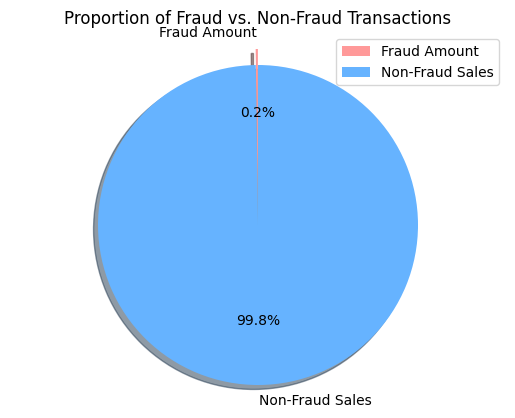

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Fraud Amount', 'Non-Fraud Sales']
sizes = [total_fraud_amount, total_nonfraud_sales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Explode the 1st slice (Fraud Amount)

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Fraud vs. Non-Fraud Transactions')
plt.legend(labels, loc='best') # Add a legend
plt.show()

The calculated fraud rate for RevoBank is 0.22%.

*   The overall transaction volume for RevoBank in the last 6 months was \$456,876,864,900.0.
*   The fraud rate for RevoBank in the last 6 months was 0.22%.




###Question 6c See the difference in transaction behaviour per card brand (Hint:Group by card brand and calculate average of transaction count and amount).

To analyze transaction behavior by card brand, group the 'df_card_filtered' DataFrame by 'card_brand' and calculate the average of the specified transaction count and amount columns. To visualize the average non-fraudulent transaction counts per card brand, create a bar chart for 'count_nonfraud_trx_L6M' from the 'df_card_brand_avg' DataFrame. This will help in easily comparing the transaction frequencies across different card brands.



In [ ]:
df_card_brand_avg = df_card_filtered.groupby('card_brand')[['count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', 'amt_fraud_trx_L6M']].mean()
display(df_card_brand_avg)

,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M
card_brand,,,,
Amex,112.941624,1.492264e+08,0.126904,207462.944162
JCB,84.395122,1.114518e+08,0.136585,185500.000000
Mastercard,121.933523,1.209153e+08,0.118379,191013.579808
Visa,116.055293,1.243378e+08,0.117202,168378.638941


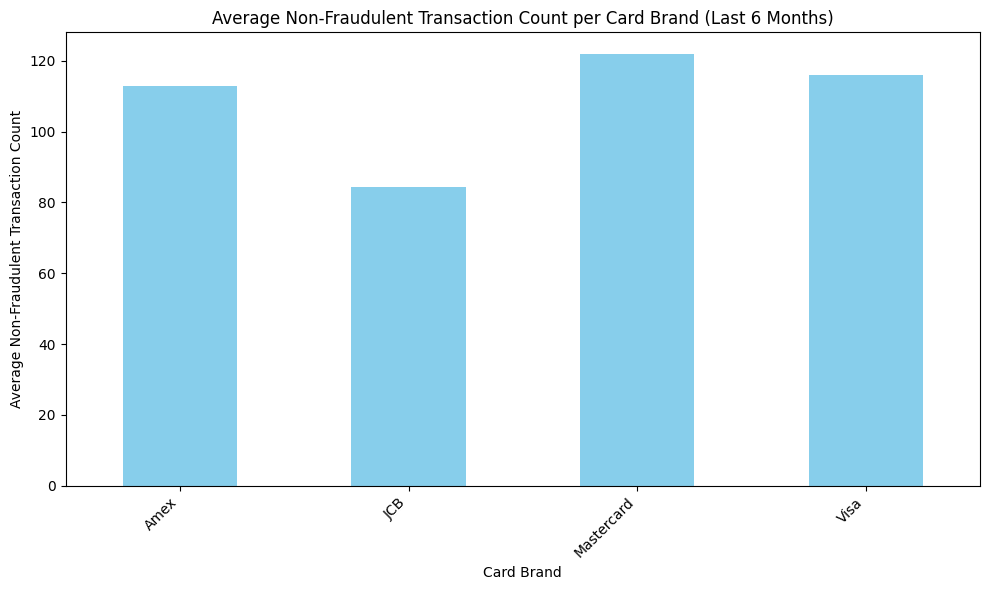

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['count_nonfraud_trx_L6M'].plot(kind='bar', color='skyblue')
plt.title('Average Non-Fraudulent Transaction Count per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Non-Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

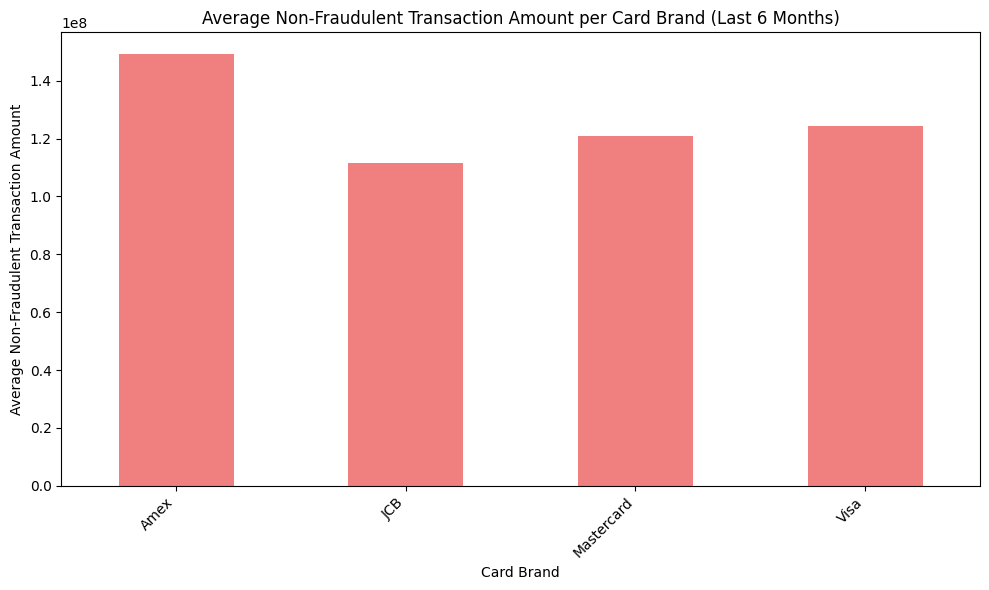

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['amt_nonfraud_trx_L6M'].plot(kind='bar', color='lightcoral')
plt.title('Average Non-Fraudulent Transaction Amount per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Non-Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

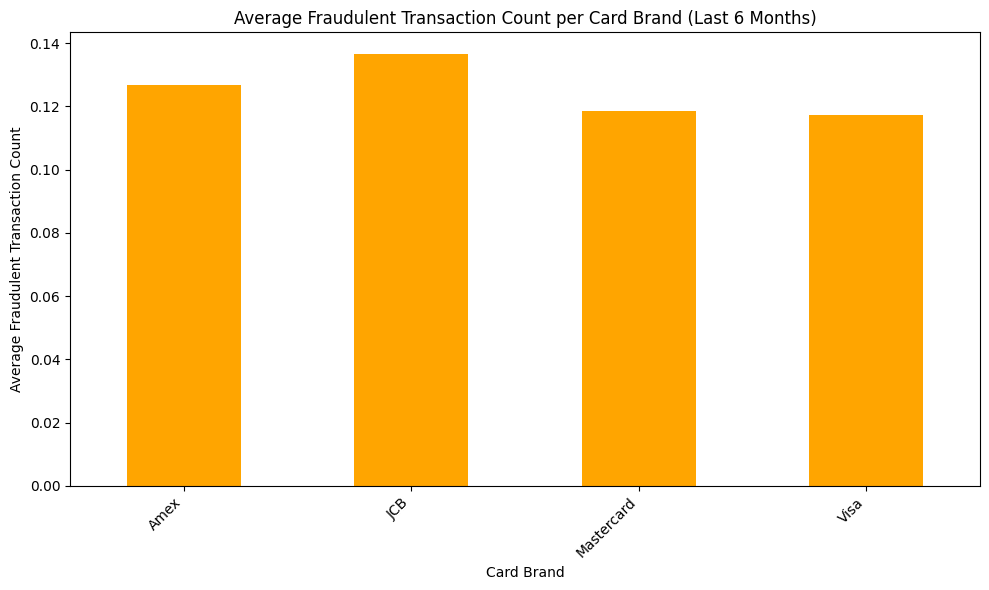

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['count_fraud_trx_L6M'].plot(kind='bar', color='orange')
plt.title('Average Fraudulent Transaction Count per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

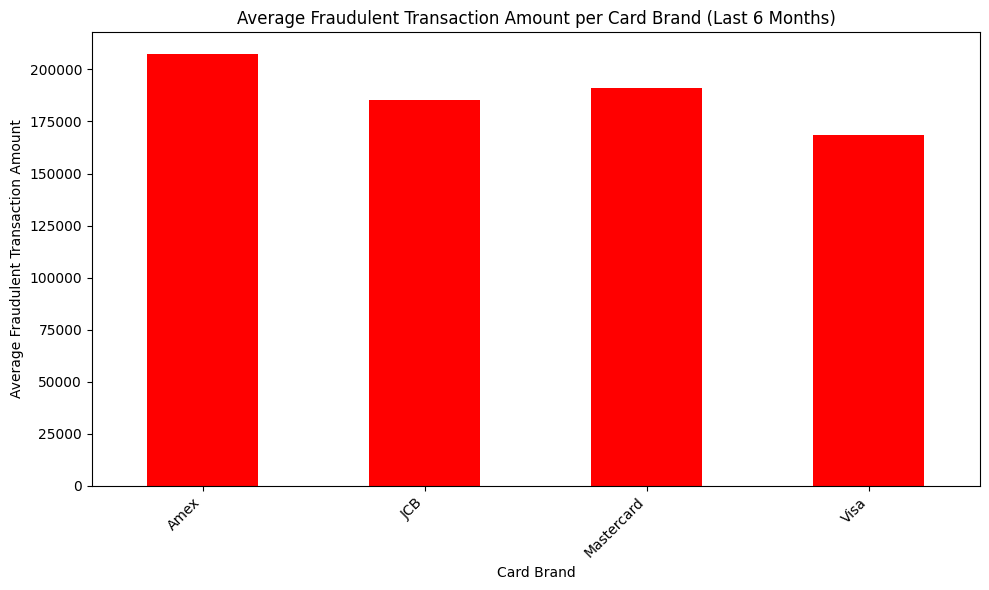

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_card_brand_avg['amt_fraud_trx_L6M'].plot(kind='bar', color='red')
plt.title('Average Fraudulent Transaction Amount per Card Brand (Last 6 Months)')
plt.xlabel('Card Brand')
plt.ylabel('Average Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the analysis of average transaction counts and amounts for both non-fraudulent and fraudulent activities across different card brands, the following key differences are observed:

**1. Non-Fraudulent Transactions:**
*   **Mastercard** generally shows the highest average non-fraudulent transaction count, indicating a higher frequency of use for legitimate purchases.
*   In terms of average non-fraudulent transaction amount, **Amex** appears to have the highest average value, suggesting that Amex cards are used for larger purchases on average. Mastercard and Visa follow with comparable average amounts, while JCB has the lowest.

**2. Fraudulent Transactions:**
*   **Amex** tends to have a slightly higher average fraudulent transaction count, though the differences across brands are not extremely pronounced. This could suggest Amex cards are targeted more frequently for fraudulent attempts.
*   Similar to non-fraudulent transactions, **Amex** also shows the highest average fraudulent transaction amount. This implies that when fraud occurs with Amex cards, it often involves higher individual transaction values.

**Overall Insights:**
*   There's a notable pattern where **Amex** cards, despite having a lower frequency of non-fraudulent transactions compared to Mastercard, tend to have higher average transaction values for both non-fraudulent and fraudulent activities. This could indicate that Amex users generally conduct higher-value transactions, which also translates to higher-value fraud incidents.
*   **Mastercard** shows the highest volume (count) of non-fraudulent transactions, but its average transaction amount (both non-fraud and fraud) is not the highest, suggesting a broad user base engaging in a mix of transaction sizes.
*   **Visa** is consistently in the mid-range for both counts and amounts, reflecting its widespread acceptance and diverse user base.
*   **JCB** generally exhibits the lowest average counts and amounts for both types of transactions, which might be due to its more limited market presence compared to the other major brands.

###Question 6d Compare the debt to income ratios of retired vs non retired users. The debt to income ratio definition is the total debt per yearly income (Hint: Group data by retired_flag and use agregate statistics to check the difference in debt to income ratios between retired vs non retired users, by need to calculate the debt to income ratio first.

In [ ]:
dti_stats = df_user.groupby('retired_flag')['DTI'].agg(['mean', 'median', 'std'])
display(dti_stats)

,mean,median,std
retired_flag,,,
0,0.295747,0.297170,0.153898
1,0.067158,0.044024,0.070973


To visualize the distribution of DTI ratios for retired and non-retired users, a boxplot is an effective choice, use 'seaborn.boxplot' for this purpose, as it provides good aesthetics and handles grouping easily.



/tmp/ipython-input-3480851374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis')


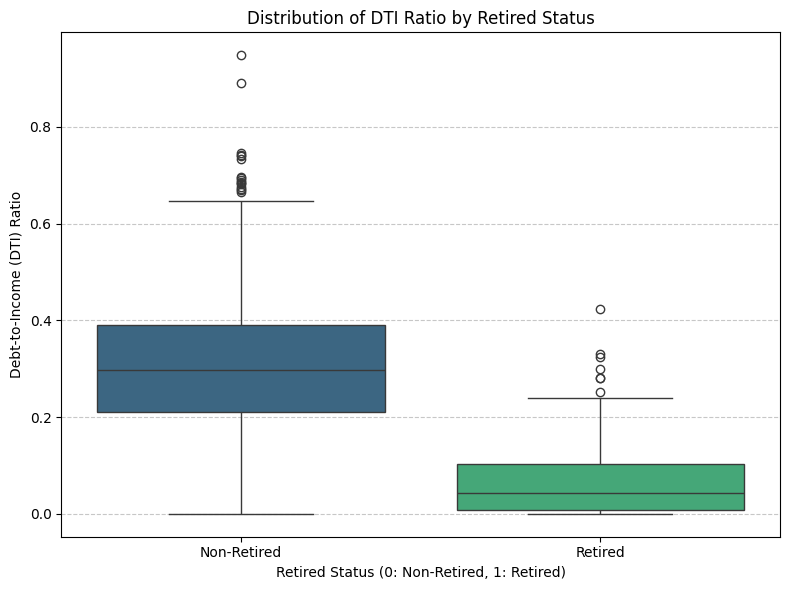

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis')
plt.title('Distribution of DTI Ratio by Retired Status')
plt.xlabel('Retired Status (0: Non-Retired, 1: Retired)')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.xticks(ticks=[0, 1], labels=['Non-Retired', 'Retired'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The previous code produced a 'FutureWarning' regarding the 'palette' argument without 'hue'. To suppress this warning and ensure future compatibility, I will explicitly set 'hue' to 'retired_flag' and 'legend' to 'False' in the 'sns.boxplot' call, as suggested by the warning.



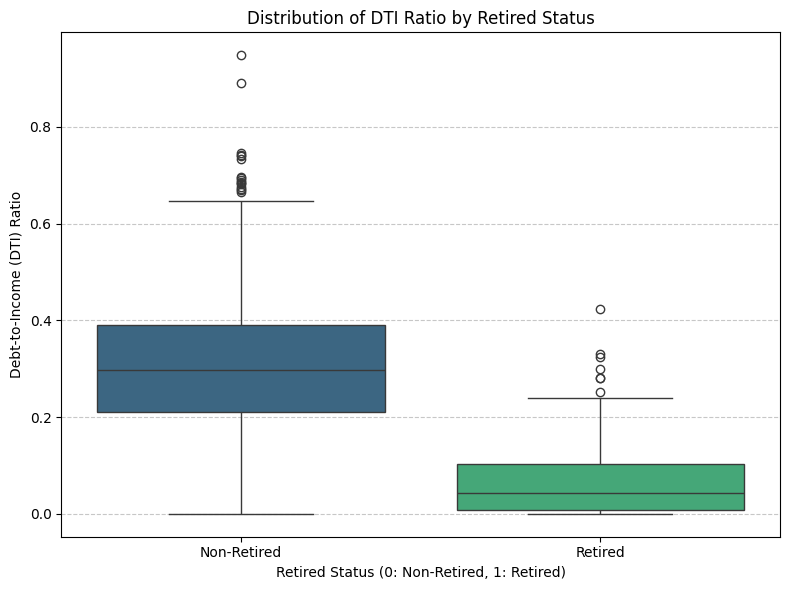

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='retired_flag', y='DTI', data=df_user, palette='viridis', hue='retired_flag', legend=False)
plt.title('Distribution of DTI Ratio by Retired Status')
plt.xlabel('Retired Status (0: Non-Retired, 1: Retired)')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.xticks(ticks=[0, 1], labels=['Non-Retired', 'Retired'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Comparison of DTI Ratios: Retired vs. Non-Retired Users

The boxplot visually confirms and enhances the observations made from the aggregate statistics regarding the Debt-to-Income (DTI) ratios between retired and non-retired users.

**Visual Analysis from Boxplot:**
*   **Non-Retired Users (retired_flag = 0):** The boxplot for non-retired users shows a higher median DTI and a wider interquartile range (IQR), indicating a greater spread and generally higher DTI values. The box is positioned higher on the y-axis, confirming that this group carries substantially more debt relative to their income. There are also a number of outliers, suggesting some non-retired individuals have exceptionally high DTI ratios.
*   **Retired Users (retired_flag = 1):** The boxplot for retired users is significantly lower on the y-axis, with a much smaller median and a narrower IQR. This indicates that the majority of retired individuals have very low DTI ratios, demonstrating a much more conservative financial profile concerning debt. The presence of fewer and lower outliers also suggests a more consistent and lower debt burden across this group.

**Quantitative Analysis (from previous aggregate statistics):**
*   **Non-Retired Users:** Mean DTI: ~0.296, Median DTI: ~0.297, Standard Deviation DTI: ~0.154.
*   **Retired Users:** Mean DTI: ~0.067, Median DTI: ~0.044, Standard Deviation DTI: ~0.071.

**Key Differences and Implications:**
1.  **Substantial DTI Disparity:** Both the boxplot and statistics clearly show a large difference in DTI ratios, with non-retired users having a DTI that is roughly 4-5 times higher on average than retired users.
2.  **Financial Stability in Retirement:** The lower DTI for retired individuals suggests a general trend of reduced debt burden as people approach and enter retirement. This could be due to paying off mortgages, reducing consumer debt, or living on more stable, fixed incomes that require less credit utilization.
3.  **Risk Assessment for Lenders:** For financial institutions, retired individuals, on average, represent a lower credit risk in terms of their debt servicing capacity. Non-retired individuals, especially those with higher DTI outliers, might require more stringent credit assessments.
4.  **Distribution Shape:** The boxplot visually supports the right-skewness observed for retired users (median lower than mean), indicating that while most have very low DTI, a few may still carry some debt. For non-retired users, the distribution appears more symmetrical around the median/mean.

In conclusion, the analysis consistently highlights that retired individuals, as a group, exhibit significantly lower and more stable Debt-to-Income ratios compared to non-retired individuals, underscoring a generally improved financial position regarding debt management.

#MERGE THE CARD DATA DAN USER DATA

Merge the card data dan user data. Make sure data is grouped by client ID (1 user can have multiple cards), recency data takes the most recent number (choose the smallest number), sum all the monetary and count columns, and exclude all non important column.

Group the 'df_card_filtered' DataFrame by 'client_id'. For each client, sum up 'credit_limit', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M'. Additionally, find the minimum value for 'days_since_last_trx' and rename this column to 'recency'.

To fulfill the subtask, group the 'df_card_filtered' DataFrame by 'client_id' and apply aggregation functions as specified summing the financial and count columns, and finding the minimum for 'days_since_last_trx' which will be renamed to 'recency'.




In [ ]:
df_card_agg = df_card_filtered.groupby('client_id').agg(
    credit_limit=('credit_limit', 'sum'),
    count_nonfraud_trx_L6M=('count_nonfraud_trx_L6M', 'sum'),
    amt_nonfraud_trx_L6M=('amt_nonfraud_trx_L6M', 'sum'),
    count_fraud_trx_L6M=('count_fraud_trx_L6M', 'sum'),
    amt_fraud_trx_L6M=('amt_fraud_trx_L6M', 'sum'),
    recency=('days_since_last_trx', 'min')
).reset_index()

display(df_card_agg.head())
display(df_card_agg.info())

,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency
0,0,165775000.0,685,535262100.0,0,0.0,3
1,1,65592000.0,498,264007900.0,0,0.0,20
2,10,108249000.0,0,0.0,0,0.0,604
3,100,236386000.0,366,295701900.0,0,0.0,5
4,1000,36225000.0,0,0.0,0,0.0,604


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               1938 non-null   object 
 1   credit_limit            1938 non-null   float64
 2   count_nonfraud_trx_L6M  1938 non-null   int64  
 3   amt_nonfraud_trx_L6M    1938 non-null   float64
 4   count_fraud_trx_L6M     1938 non-null   int64  
 5   amt_fraud_trx_L6M       1938 non-null   float64
 6   recency                 1938 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 106.1+ KB


None

The next step is to merge the aggregated card data ('df_card_agg') with the user data ('df_user') based on the common client identifier. This will combine the card related metrics with the user demographic and financial information.



In [ ]:
df_merged = pd.merge(df_user, df_card_agg, left_on='id', right_on='client_id', how='inner')

print("First 5 rows of the merged DataFrame:")
display(df_merged.head())

print("\nInformation about the merged DataFrame:")
df_merged.info()

First 5 rows of the merged DataFrame:


,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21



Information about the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1938 non-null   object        
 1   retirement_age          1938 non-null   int64         
 2   birthdate               1938 non-null   datetime64[ns]
 3   gender                  1938 non-null   object        
 4   per_capita_income       1938 non-null   float64       
 5   yearly_income           1938 non-null   float64       
 6   total_debt              1938 non-null   float64       
 7   credit_score            1938 non-null   int64         
 8   age                     1938 non-null   int64         
 9   retired_flag            1938 non-null   int64         
 10  DTI                     1938 non-null   float64       
 11  client_id               1938 non-null   object        
 12  credit_

The successful merge of the card and user data resulted in 'df_merged', a DataFrame with 1938 entries and 18 columns. This DataFrame combines user-specific information from 'df_user with aggregated card activity data from df_card_agg'.

The aggregated columns from the card data now present in 'df_merged' are: 'credit_limit' (summed), 'count_nonfraud_trx_L6M' (summed), 'amt_nonfraud_trx_L6M' (summed), 'count_fraud_trx_L6M' (summed), 'amt_fraud_trx_L6M' (summed), and 'recency' (minimum 'days_since_last_trx').

*   The 'df_card_filtered' DataFrame was successfully aggregated by 'client_id', resulting in 'df_card_agg' with 1938 entries and 7 columns.
*   The aggregation involved summing 'credit_limit', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M' for each client.
*   The minimum 'days_since_last_trx' was calculated and renamed to 'recency' for each client.
*   The 'df_user' DataFrame was successfully merged with 'df_card_agg' using an inner join on 'df_user['id']' and 'df_card_agg['client_id']'.
*   The final 'df_merged' DataFrame contains 1938 entries and 18 columns, integrating both user demographics and the aggregated card transaction metrics.

Condition for next step
*   The 'df_merged' DataFrame now provides a comprehensive view of each client, combining demographic information with their aggregated card usage and fraud-related statistics, which is crucial for client-centric analysis.
*   This integrated dataset is ready for further analysis, such as building predictive models for customer behavior, fraud detection, or credit risk assessment, by leveraging the combined features.


###Question 6e Calculate the average of Debt to income ratio (DTI) based on credit score category (poor, fair, good, very good, exceptional). Hint: Use pd.cut to categorise the credit score into different scoring also add the breakdown of the transaction behaviour (transaction count and transaction amount)


The user is asking to calculate and visualize the average Debt-to-Income (DTI) ratio and transaction behavior (counts and amounts for non-fraudulent and fraudulent transactions) based on different credit score categories. The credit scores should be categorized into "Poor", "Fair", "Good", "Very Good", and "Exceptional" using 'pd.cut'.

Therefore, the task is:
Calculate the average Debt-to-Income (DTI) ratio, average non fraudulent transaction count and amount, and average fraudulent transaction count and amount for each credit score category (Poor, Fair, Good, Very Good, Exceptional) from the 'df_merged' DataFrame, visualize these averages using bar charts, and summarize the key insights.

####Define Credit Score Categories
Define the bins and labels for credit score categories (Poor, Fair, Good, Very Good, Exceptional) based on standard credit score ranges. To define the credit score categories, I will first define the numerical bins for the credit score ranges and then the corresponding string labels, as specified in the instructions.


In [ ]:
bins = [0, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

print(f"Credit Score Bins: {bins}")
print(f"Credit Score Labels: {labels}")

Credit Score Bins: [0, 579, 669, 739, 799, 850]
Credit Score Labels: ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']


Now that the bins and labels for credit score categories are defined, use 'pd.cut' to categorize the 'credit_score' column in 'df_merged' into these defined categories and store them in a new column called 'credit_score_category'.



In [ ]:
df_merged['credit_score_category'] = pd.cut(df_merged['credit_score'], bins=bins, labels=labels, right=True, include_lowest=True)
display(df_merged.head())

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good


To analyze the average DTI and transaction behaviors for each credit score category, group the 'df_merged' DataFrame by 'credit_score_category' and calculate the mean for 'DTI', 'count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M', 'count_fraud_trx_L6M', and 'amt_fraud_trx_L6M'.



In [ ]:
credit_score_agg = df_merged.groupby('credit_score_category').agg(
    avg_dti=('DTI', 'mean'),
    avg_count_nonfraud_trx=('count_nonfraud_trx_L6M', 'mean'),
    avg_amt_nonfraud_trx=('amt_nonfraud_trx_L6M', 'mean'),
    avg_count_fraud_trx=('count_fraud_trx_L6M', 'mean'),
    avg_amt_fraud_trx=('amt_fraud_trx_L6M', 'mean')
).reset_index()

display(credit_score_agg)

/tmp/ipython-input-647653057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_agg = df_merged.groupby('credit_score_category').agg(


,credit_score_category,avg_dti,avg_count_nonfraud_trx,avg_amt_nonfraud_trx,avg_count_fraud_trx,avg_amt_fraud_trx
0,Poor,0.301839,305.480519,2.290265e+08,0.272727,309531.168831
1,Fair,0.318218,287.595092,2.019485e+08,0.312883,467417.177914
2,Good,0.250306,337.049288,2.419351e+08,0.342826,554249.288061
3,Very Good,0.245725,366.563043,2.478267e+08,0.371739,532647.826087
4,Exceptional,0.242909,350.302469,2.315197e+08,0.320988,531597.530864


The previous code produced a 'FutureWarning' related to 'groupby' on categorical columns. To explicitly retain the current behavior and suppress the warning, add 'observed=False' to the 'groupby' method call.



In [ ]:
credit_score_agg = df_merged.groupby('credit_score_category', observed=False).agg(
    avg_dti=('DTI', 'mean'),
    avg_count_nonfraud_trx=('count_nonfraud_trx_L6M', 'mean'),
    avg_amt_nonfraud_trx=('amt_nonfraud_trx_L6M', 'mean'),
    avg_count_fraud_trx=('count_fraud_trx_L6M', 'mean'),
    avg_amt_fraud_trx=('amt_fraud_trx_L6M', 'mean')
).reset_index()

display(credit_score_agg)

,credit_score_category,avg_dti,avg_count_nonfraud_trx,avg_amt_nonfraud_trx,avg_count_fraud_trx,avg_amt_fraud_trx
0,Poor,0.301839,305.480519,2.290265e+08,0.272727,309531.168831
1,Fair,0.318218,287.595092,2.019485e+08,0.312883,467417.177914
2,Good,0.250306,337.049288,2.419351e+08,0.342826,554249.288061
3,Very Good,0.245725,366.563043,2.478267e+08,0.371739,532647.826087
4,Exceptional,0.242909,350.302469,2.315197e+08,0.320988,531597.530864


To visualize the average DTI for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_dti' column.



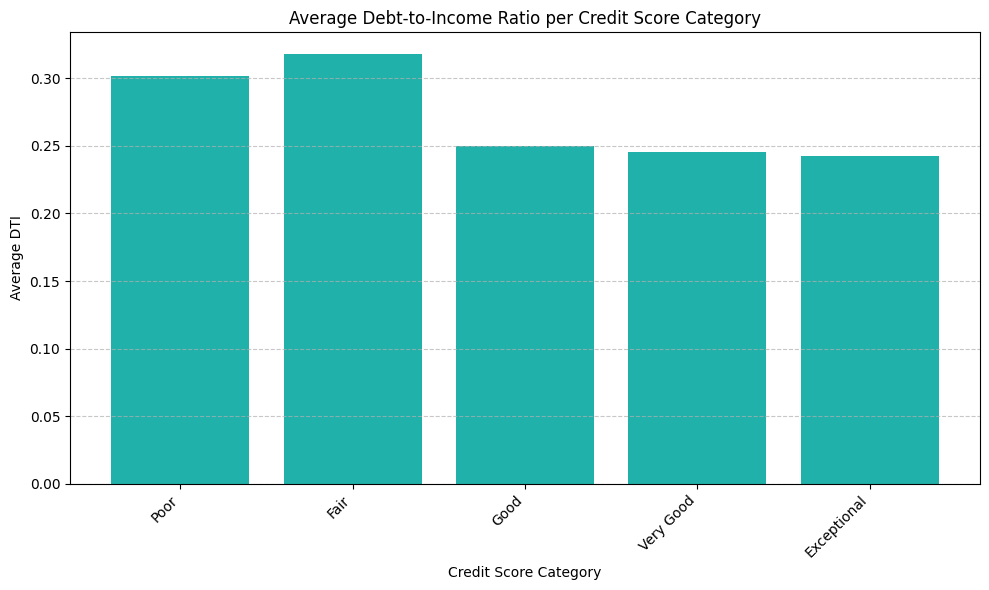

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_dti'], color='lightseagreen')
plt.title('Average Debt-to-Income Ratio per Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Average DTI')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average non-fraudulent transaction count for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_count_nonfraud_trx' column.



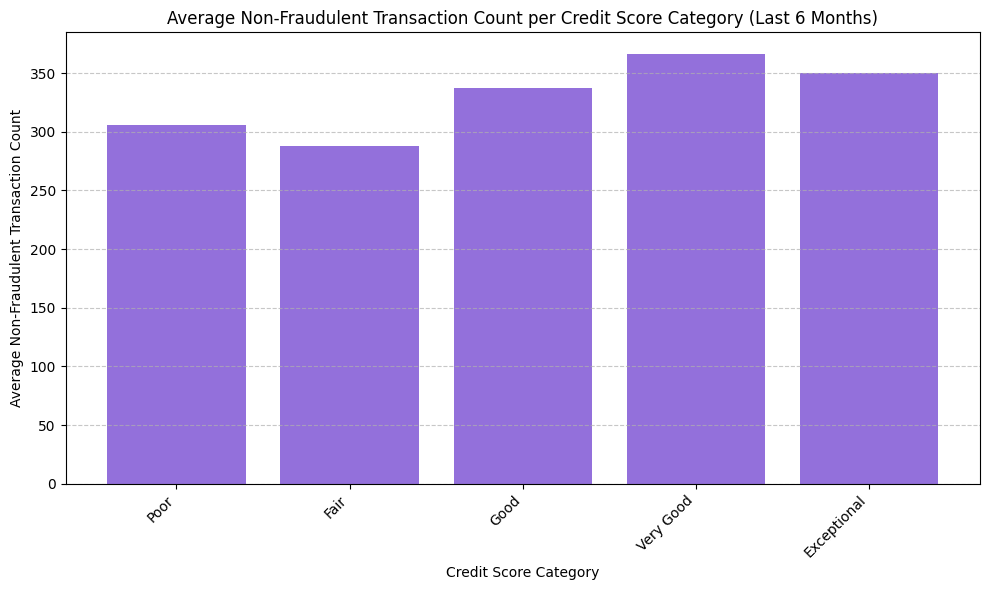

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_count_nonfraud_trx'], color='mediumpurple')
plt.title('Average Non-Fraudulent Transaction Count per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Non-Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average non-fraudulent transaction amount for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_amt_nonfraud_trx' column.



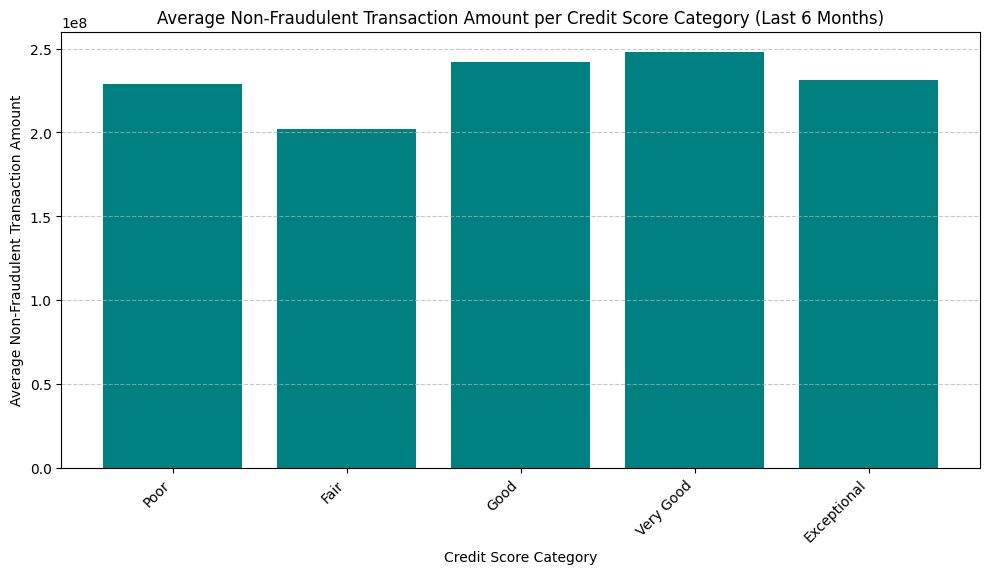

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_amt_nonfraud_trx'], color='teal')
plt.title('Average Non-Fraudulent Transaction Amount per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Non-Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average fraudulent transaction count for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_count_fraud_trx' column.



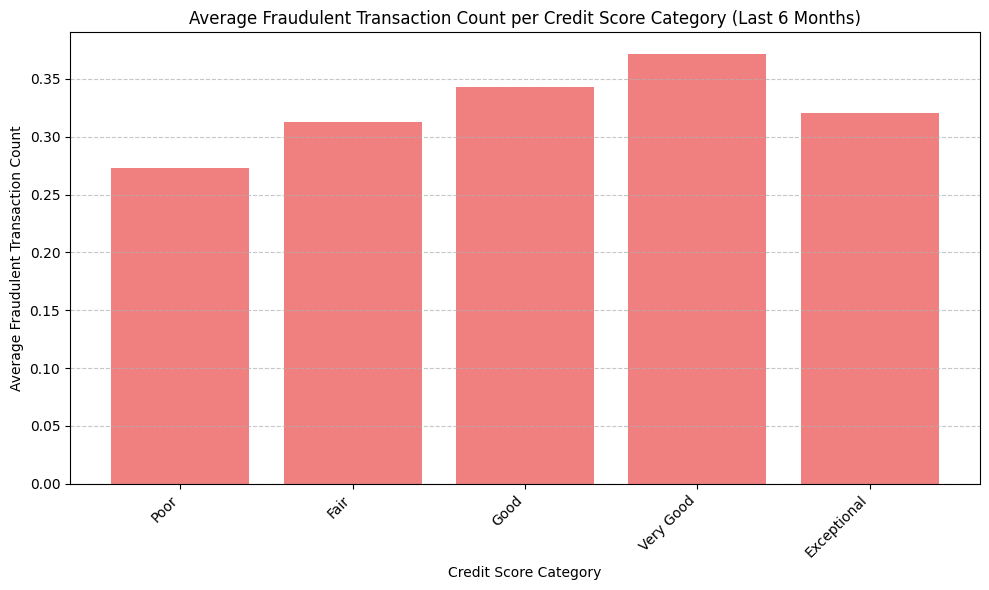

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_count_fraud_trx'], color='lightcoral')
plt.title('Average Fraudulent Transaction Count per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Fraudulent Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To visualize the average fraudulent transaction amount for each credit score category, create a bar chart using the 'credit_score_agg' DataFrame's 'avg_amt_fraud_trx' column.



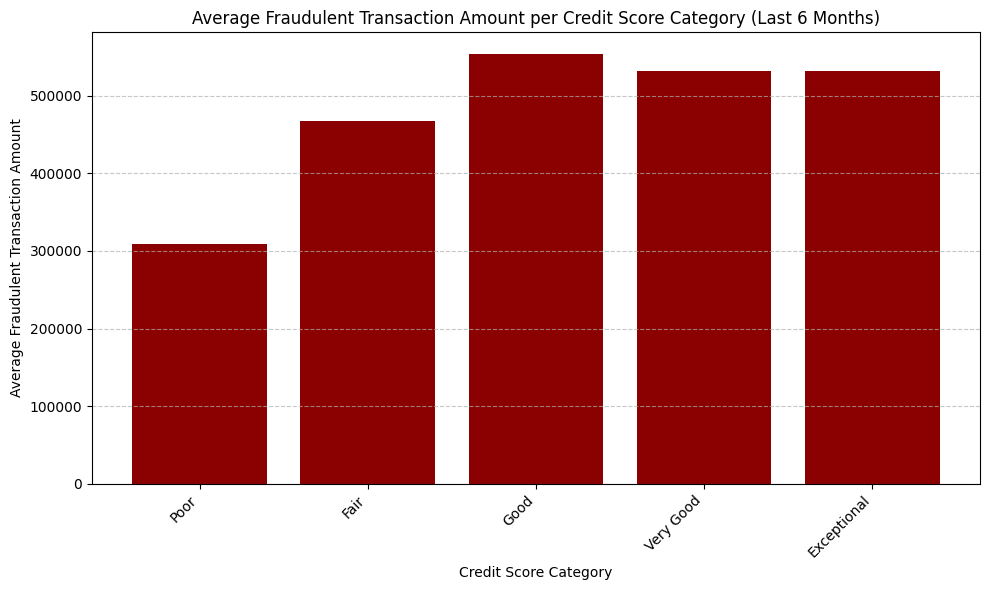

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(credit_score_agg['credit_score_category'], credit_score_agg['avg_amt_fraud_trx'], color='darkred')
plt.title('Average Fraudulent Transaction Amount per Credit Score Category (Last 6 Months)')
plt.xlabel('Credit Score Category')
plt.ylabel('Average Fraudulent Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

####Summary of DTI and Transaction Behavior by Credit Score Category

Based on the analysis of Debt-to-Income (DTI) ratios and transaction behaviors (non-fraudulent and fraudulent counts and amounts) across different credit score categories, the following key observations can be made ( Credit scores were categorized into 'Poor' (0-579), 'Fair' (580-669), 'Good' (670-739), 'Very Good' (740-799), and 'Exceptional' (800-850)) :

**1. Debt-to-Income (DTI) Ratio :**
*   **Fair** credit score category has the highest average DTI (approximately 0.318), indicating that users in this category carry a higher debt burden relative to their income.
*   **Poor** credit score category follows closely with an average DTI of about 0.302.
*   **Good**, **Very Good**, and **Exceptional** categories show progressively lower average DTI ratios, with **Exceptional** having the lowest at approximately 0.243. This aligns with expectations, as individuals with higher credit scores typically manage their debt more effectively.

**2. Non-Fraudulent Transaction Count :**
*   Users in the **Very Good** credit score category show the highest average non-fraudulent transaction count (approximately 366.56 transactions).
*   **Exceptional** and **Good** categories also have high average counts, suggesting that users with better credit scores tend to use their cards more frequently for legitimate transactions.
*   **Poor** and **Fair** categories have lower average non-fraudulent transaction counts, implying less frequent card usage or a preference for other payment methods.

**3. Non-Fraudulent Transaction Amount :**
*   **Very Good** credit score category also leads in average non-fraudulent transaction amount (approximately 2.478e+08), indicating that these users not only transact frequently but also make larger legitimate purchases.
*   Similar to counts, **Good** and **Exceptional** categories exhibit high average non-fraudulent transaction amounts, reinforcing the idea that higher credit score users drive significant legitimate transaction volume and value.
*   **Poor** and **Fair** categories have lower average non-fraudulent transaction amounts.

**4. Fraudulent Transaction Count :**
*   The average fraudulent transaction counts are relatively low across all categories, but there's a slight increase from **Poor** to **Good** and **Very Good** categories, with **Very Good** showing the highest average (approximately 0.372). This might suggest that fraudsters target cards from users with better credit scores, possibly due to higher credit limits or perceived higher value.

**5. Fraudulent Transaction Amount :**
*   The average fraudulent transaction amounts are also relatively small, but **Good** and **Exceptional** categories show slightly higher average fraudulent amounts (around 5.54e+05 and 5.31e+05, respectively). This could imply that when fraud occurs in these higher credit score categories, it involves slightly larger monetary values.

**Overall Insights:**
*   There's a clear inverse relationship between credit score and DTI: as credit scores improve, DTI ratios decrease, suggesting better financial health.
*   Users with higher credit scores (**Good**, **Very Good**, **Exceptional**) are generally more active with their cards, having both higher non-fraudulent transaction counts and amounts. They represent a significant portion of legitimate transaction volume and value.
*   While fraud is present across all categories, there's a nuanced pattern. Higher credit score categories might experience slightly more frequent or higher-value fraudulent incidents, possibly due to higher credit limits making them more attractive targets. However, the overall fraud amounts are very small compared to non-fraudulent amounts, which is a positive sign.

6f.Present the findings in a line chart to see the relationship between user age and credit limit (Hint:Sum the credit limit by user age then devide by total number, trim the user age to prevent small and volatile data in the higher age).

Aggregate the 'df_merged' DataFrame by 'age' to calculate the average 'credit_limit' for each age, trimming the age range to exclude very old ages to prevent volatile data. Prepare the data for visualization as requested, group the 'df_merged' DataFrame by 'age' and calculate the mean of 'credit_limit'. Then, create a line chart to visualize the relationship between user age and average credit limit, including appropriate titles and axis labels. Finally, summarize the key findings from the line chart, highlighting any observed trends or relationships.

In [ ]:
avg_credit_limit_by_age = df_merged.groupby('age')['credit_limit'].mean().reset_index()
display(avg_credit_limit_by_age.head())

,age,credit_limit
0,17,4.609672e+07
1,18,4.808706e+07
2,19,4.789100e+07
3,20,4.886413e+07
4,21,4.057080e+07


To filter out potential volatility from very old age groups with fewer data points, filter the 'avg_credit_limit_by_age' DataFrame to include only ages up to 85.



In [ ]:
avg_credit_limit_by_age_trimmed = avg_credit_limit_by_age[avg_credit_limit_by_age['age'] <= 85]
display(avg_credit_limit_by_age_trimmed.head())
display(avg_credit_limit_by_age_trimmed.tail())

,age,credit_limit
0,17,4.609672e+07
1,18,4.808706e+07
2,19,4.789100e+07
3,20,4.886413e+07
4,21,4.057080e+07


,age,credit_limit
64,81,8.785650e+07
65,82,1.058914e+08
66,83,1.590255e+08
67,84,8.785744e+07
68,85,9.649889e+07


To visualize the relationship between user age and average credit limit, create a line chart using the `avg_credit_limit_by_age_trimmed` DataFrame.



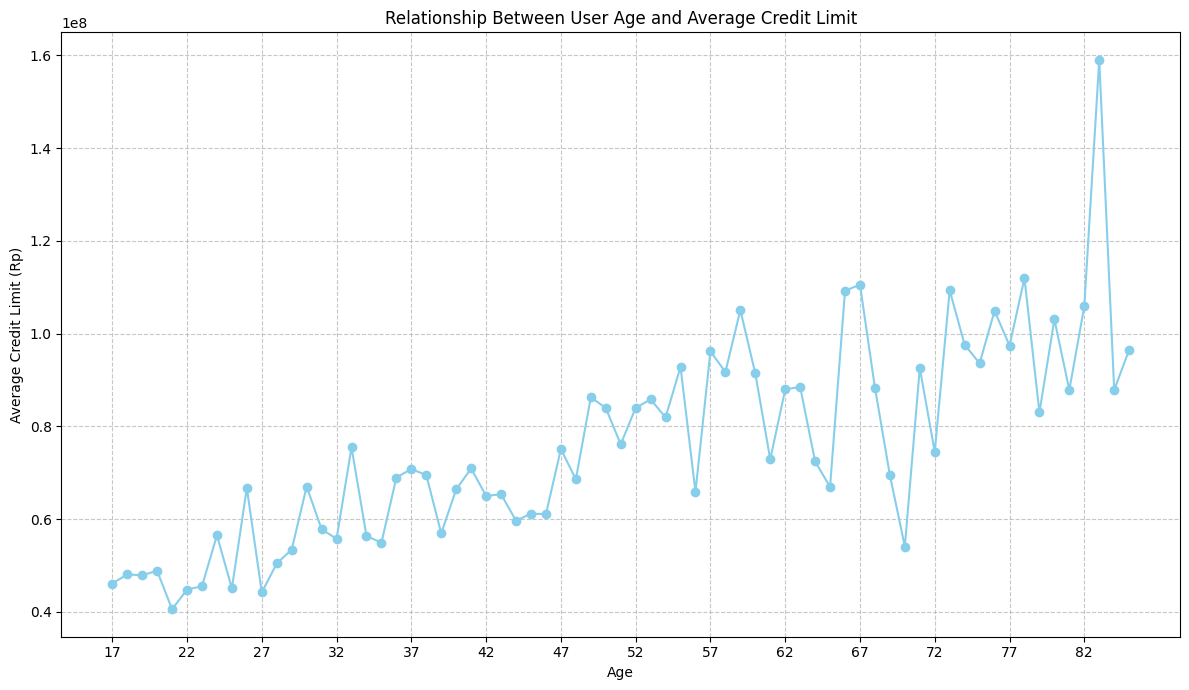

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(avg_credit_limit_by_age_trimmed['age'], avg_credit_limit_by_age_trimmed['credit_limit'], marker='o', linestyle='-', color='skyblue')
plt.title('Relationship Between User Age and Average Credit Limit')
plt.xlabel('Age')
plt.ylabel('Average Credit Limit (Rp)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(avg_credit_limit_by_age_trimmed['age'].unique()[::5]) # Show x-ticks every 5 years
plt.tight_layout()
plt.show()

#MILESTONE 3

In [ ]:
df_merged.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good


In [ ]:
backup=df_merged.copy()

In [ ]:
# Make a copy of the clean data for segmentation
df_segmentation = df_merged.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1938 non-null   object        
 1   retirement_age          1938 non-null   int64         
 2   birthdate               1938 non-null   datetime64[ns]
 3   gender                  1938 non-null   object        
 4   per_capita_income       1938 non-null   float64       
 5   yearly_income           1938 non-null   float64       
 6   total_debt              1938 non-null   float64       
 7   credit_score            1938 non-null   int64         
 8   age                     1938 non-null   int64         
 9   retired_flag            1938 non-null   int64         
 10  DTI                     1938 non-null   float64       
 11  client_id               1938 non-null   object        
 12  credit_limit            1938 non-null   float64 

#KMeans Segmentation

###A. Data Preprocessing

To understand which customer segments that potential to be encouraged to spend more, hence higher income for RevoBank,  these features are chosen as the primary segmentation criteria due to their strong relevance:
1. amt_nonfraud_trx_L6M (Total non-fraud transaction amount in the last 6 months)
- Measures actual spending power : The transaction amount reflects how much customers truly spend using their cards.
- Direct profitability indicator : Higher transaction amounts translate into greater potential revenue from fees and interest.
- Noise reduction : Focusing on non-fraud transactions ensures cleaner, more reliable behavioral data.

2. count_nonfraud_trx_L6M (Number of non-fraud transactions in the last 6 months)
- Captures activity and engagement : Frequency of transactions shows whether customers are active or occasional users.
- Loyalty & habit indicator : Customers with consistent transaction patterns are easier to retain and grow.
- Complementary to amount: Helps distinguish between “big spenders with few transactions” versus “small spenders with frequent transactions.”

3. credit_limit (Credit limit)
- Represents maximum spending capacity : The limit defines the ceiling of how much a customer can spend.
- Upsell opportunity : Customers with high limits but low usage can be targeted with promotions to increase activity.
- Risk management factor : Credit limits are tied to risk exposure, so segmentation must balance potential profit with safety.


4. DTI (Debt-to-Income Ratio)
- Measures financial health : Indicates how much debt a customer carries relative to their income.
- Risk filter : High DTI customers are riskier, while low DTI customers are safer for upselling or limit increases.
- Profit vs risk balance: Ensures segmentation strategies are sustainable and not overly aggressive.
- Credit risk dimension : Complements transaction behavior by adding a risk perspective.


In [ ]:
df_segmentation = df_merged.copy()
df_segmentation_feature = df_segmentation[(df_segmentation['amt_nonfraud_trx_L6M'] != 0) & (df_segmentation['count_nonfraud_trx_L6M'] != 0)][['amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']]
display(df_segmentation_feature.head())

,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI
0,755489800.0,599,164867000.0,0.407184
1,388726600.0,189,102033000.0,0.471786
2,705750600.0,1322,209210000.0,0.001117
3,897483900.0,378,558975000.0,0.154201
4,763527700.0,496,54758000.0,0.319271


####A.1. Distribution Check

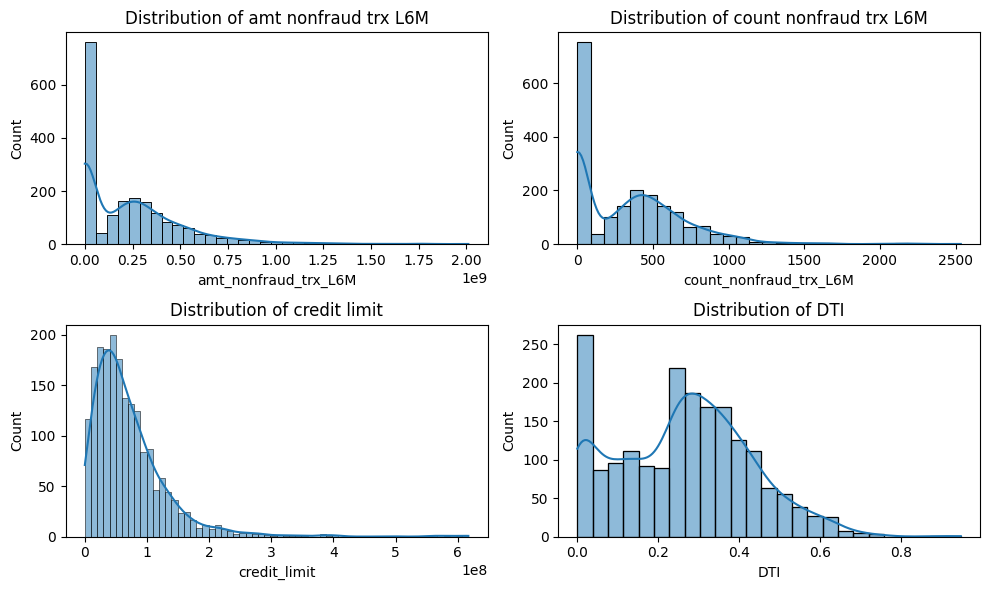

In [ ]:
# Plot the distribution of amt_nonfraud_trx_L6M, count_nonfraud_trx_L6M, credit_limit, and DTI
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
sns.histplot(df_segmentation['amt_nonfraud_trx_L6M'], kde=True)
plt.title('Distribution of amt nonfraud trx L6M')

plt.subplot(2, 2, 2)
sns.histplot(df_segmentation['count_nonfraud_trx_L6M'], kde=True)
plt.title('Distribution of count nonfraud trx L6M')

plt.subplot(2, 2, 3)
sns.histplot(df_segmentation['credit_limit'], kde=True)
plt.title('Distribution of credit limit')

plt.subplot(2, 2, 4)
sns.histplot(df_segmentation['DTI'], kde=True)
plt.title('Distribution of DTI')

plt.tight_layout()
plt.show()

1. amt_nonfraud_trx_L6M – Total Amount of Non-Fraud Transactions
- Distribusi sangat skew ke kanan (right-skewed) → mayoritas nasabah memiliki nilai transaksi rendah, hanya sedikit yang sangat tinggi.
- Ada outlier besar → segelintir nasabah menyumbang transaksi sangat tinggi.
- Insight: RevoBank bisa fokus pada segmen kecil yang sangat profitable, sambil mendorong nasabah lain untuk naik kelas.

2. count_nonfraud_trx_L6M – Frequency of Non-Fraud Transactions
- Distribusi juga skew ke kanan, tapi lebih lebar dari amt.
- Banyak nasabah dengan frekuensi rendah, tapi ada kelompok yang sangat aktif.
- Insight: Ada peluang untuk meningkatkan frekuensi transaksi melalui edukasi, reminder, atau bundling.

3. credit_limit
- Distribusi skew ke kanan, tapi lebih smooth → sebagian besar nasabah punya limit rendah hingga sedang.
- Ada kelompok kecil dengan limit sangat tinggi.
- Insight: Banyak nasabah dengan limit rendah → bisa ditargetkan untuk peningkatan limit jika DTI dan aktivitas mendukung.

4. DTI – Debt-to-Income Ratio
- Distribusi bimodal atau menyebar, dengan puncak di DTI rendah dan sebagian di DTI tinggi.
- Ada nasabah dengan DTI = 0 → sangat aman secara kredit.
- Insight: RevoBank bisa memprioritaskan nasabah dengan DTI rendah untuk upsell dan ekspansi, serta memonitor yang DTI tinggi.

---> Kesimpulan Strategis
- Mayoritas nasabah berada di zona rendah transaksi dan rendah limit, tapi ada segmen kecil yang sangat aktif dan bernilai tinggi.
- Distribusi DTI menunjukkan bahwa risiko kredit sangat bervariasi, jadi strategi upsell harus selektif.



####A.2. Applying Scaling Method

*These recommendations are intended to guide the selection of an appropriate scaling method based on data distribution.The choice of scaling method for K-Means is not always straightforward and may require experimentation. The suitability of a particular method should be assessed by the interpretability of the resulting clusters.If the clustering results are not deemed satisfactory, alternative scaling methods can be explored.*

In [ ]:
from scipy.stats import shapiro, skew

def determine_scaler(data, column_name):
    # Perform Shapiro-Wilk test for normality and calculate skewness
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    # Print results for debugging
    print(f"{column_name} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    # Determine which scaler to use
    if p_value > 0.05 and -1 <= skewness <= 1:
        scaler = "StandardScaler"
    elif p_value < 0.05 and -1 <= skewness <= 1:
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler = "RobustScaler"
    else:
        scaler = "RobustScaler"

    return scaler

# Example usage with the dataframe 'df_segmentation'
amt_nonfraud_trx_L6M_scaler = determine_scaler(df_segmentation, 'amt_nonfraud_trx_L6M')
count_nonfraud_trx_L6M_scaler = determine_scaler(df_segmentation, 'count_nonfraud_trx_L6M')
credit_limit_scaler = determine_scaler(df_segmentation, 'credit_limit')
DTI_scaler = determine_scaler(df_segmentation, 'DTI')

print(f"Recommended Scaler for amt nonfraud trx L6M: {amt_nonfraud_trx_L6M_scaler}")
print(f"Recommended Scaler for count nonfraud trx L6M: {count_nonfraud_trx_L6M_scaler}")
print(f"Recommended Scaler for credit limit: {credit_limit_scaler}")
print(f"Recommended Scaler for DTI: {DTI_scaler}")

amt_nonfraud_trx_L6M - Shapiro-Wilk Test: Statistic=0.8266999771030535, p-value=1.369080023968494e-41
amt_nonfraud_trx_L6M - Skewness: 1.5673495371752115
count_nonfraud_trx_L6M - Shapiro-Wilk Test: Statistic=0.853345369640613, p-value=3.894318813234597e-39
count_nonfraud_trx_L6M - Skewness: 1.214398089050083
credit_limit - Shapiro-Wilk Test: Statistic=0.7667417937187556, p-value=3.772199036085486e-46
credit_limit - Skewness: 3.060395652602959
DTI - Shapiro-Wilk Test: Statistic=0.9721863852426098, p-value=6.244880265281098e-19
DTI - Skewness: 0.1862232300989867
Recommended Scaler for amt nonfraud trx L6M: RobustScaler
Recommended Scaler for count nonfraud trx L6M: RobustScaler
Recommended Scaler for credit limit: RobustScaler
Recommended Scaler for DTI: MinMaxScaler


*Scaling is essential to ensure that features contribute equally to the distance calculations. If features have vastly different scales, those with larger ranges can dominate the distance calculations, leading to biased clustering results. Scaling changes the scale of the data but does not necessarily change its overall distribution shape.*

In [ ]:
df_segmentation_feature.head()

,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI
0,755489800.0,599,164867000.0,0.407184
1,388726600.0,189,102033000.0,0.471786
2,705750600.0,1322,209210000.0,0.001117
3,897483900.0,378,558975000.0,0.154201
4,763527700.0,496,54758000.0,0.319271


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Scaling methods: StandardScaler, MinMaxScaler, RobustScaler

# Standardization
standard_scaler = StandardScaler()
df_segmentation_standard = standard_scaler.fit_transform(df_segmentation_feature)
df_segmentation_standard = pd.DataFrame(df_segmentation_standard, columns=df_segmentation_feature.columns)

# Normalization
minmax_scaler = MinMaxScaler()
df_segmentation_normalized = minmax_scaler.fit_transform(df_segmentation_feature)
df_segmentation_normalized = pd.DataFrame(df_segmentation_normalized, columns=df_segmentation_feature.columns)

# Robust scaling
robust_scaler = RobustScaler()
df_segmentation_robust = robust_scaler.fit_transform(df_segmentation_feature)
df_segmentation_robust = pd.DataFrame(df_segmentation_robust, columns=df_segmentation_feature.columns)

In [ ]:
df_segmentation_normalized.head()

,amt_nonfraud_trx_L6M,count_nonfraud_trx_L6M,credit_limit,DTI
0,0.375570,0.234783,0.266480,0.456955
1,0.193163,0.072727,0.164525,0.529453
2,0.350833,0.520553,0.338432,0.001253
3,0.446190,0.147431,0.905966,0.173050
4,0.379568,0.194071,0.087816,0.358296


###B. Determine Cluster Number

####Elbow Method

*Searching for the point at which the decrease in inertia begins to slow.*

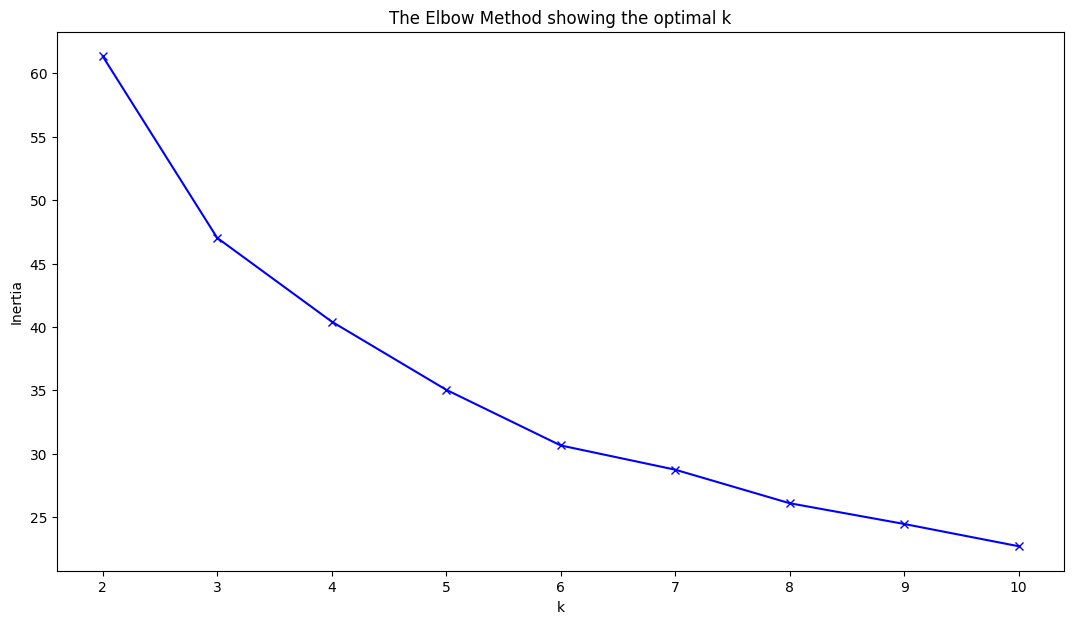

[61.346824989396886, 47.02357469387333, 40.42140885849031, 35.04630501501322, 30.656574869533326, 28.74551830283757, 26.099205071593392, 24.464316354838832, 22.708296049312167]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1000, n_init='auto')
    kmeanModel.fit(df_segmentation_normalized)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(13,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

- The inertia curve shows a sharp decline up to k = 6, after which the curve flattens.
- The most noticeable "elbow" appears at k = 6, traditionally interpreted as the optimal number of clusters based on inertia reduction.

- Use k = 3 for segmentation tasks that require clearly defined and interpretable clusters.
- Consider k = 6 if the goal is to capture more nuanced patterns in the data, even if the clusters are less distinct.


####Silhouette Analysis

For k=2, the average silhouette score is 0.33275344682480834
For k=3, the average silhouette score is 0.3403299730392498
For k=4, the average silhouette score is 0.26542059431711756
For k=5, the average silhouette score is 0.28311067883714736
For k=6, the average silhouette score is 0.29143855882955105
For k=7, the average silhouette score is 0.27010428848142676
For k=8, the average silhouette score is 0.23106630118159655
For k=9, the average silhouette score is 0.23649608521454032
For k=10, the average silhouette score is 0.23468904556223874


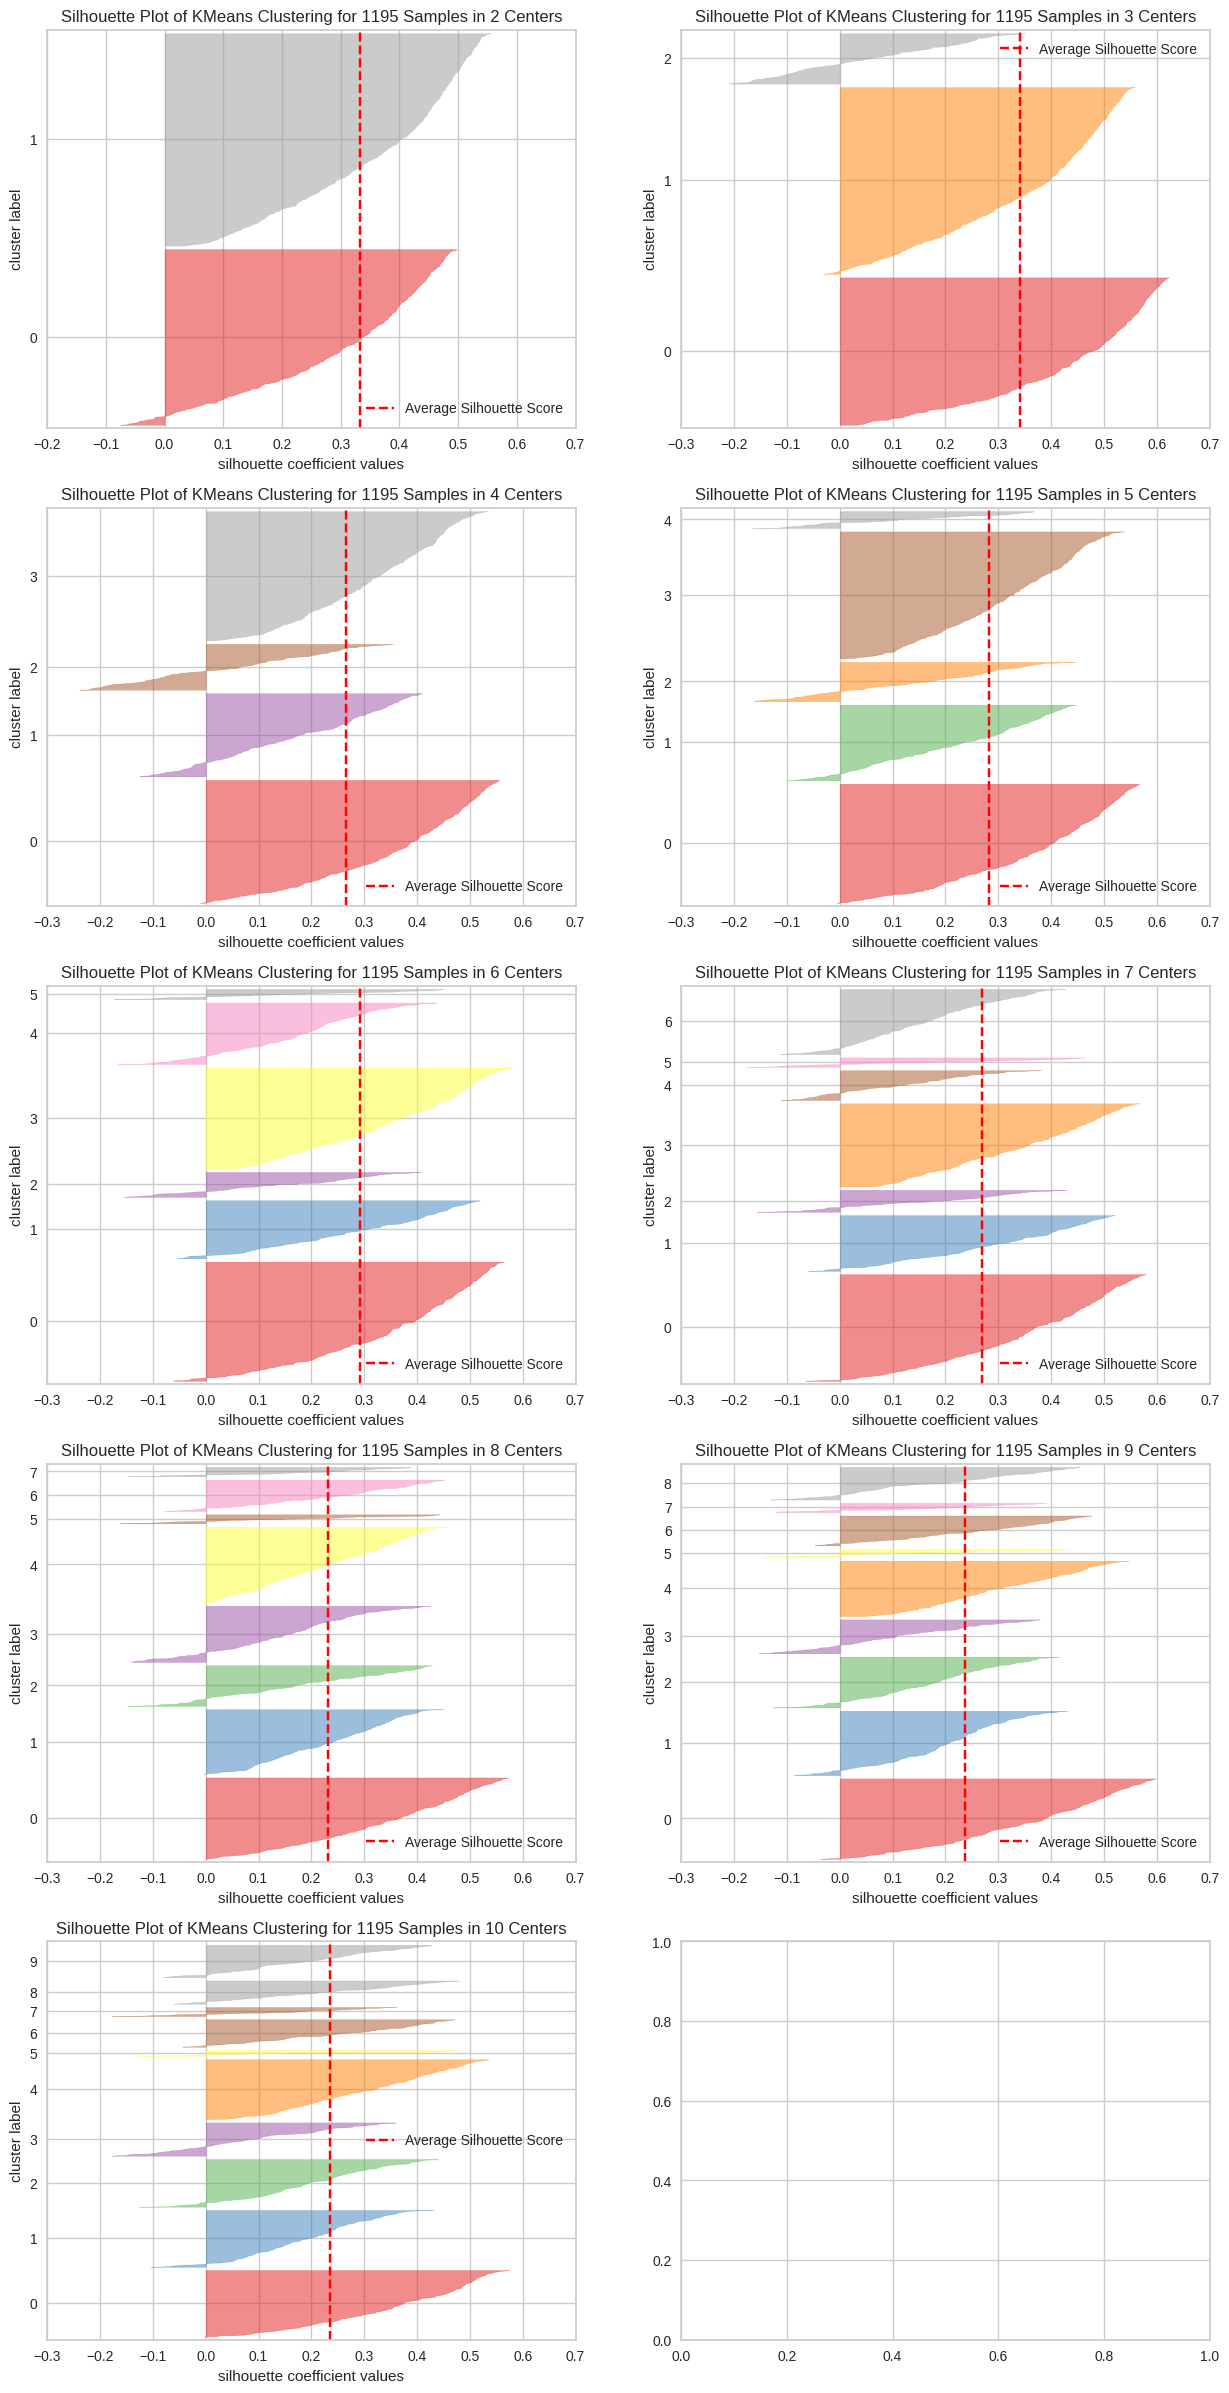

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import matplotlib.pyplot as plt

K_range = range(2,11)
banyak_K = len(K_range)
n_baris = int(np.ceil(banyak_K/2))

fig, ax = plt.subplots(n_baris, 2, figsize=(15,30))

for index, K in enumerate(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=1000, n_init='auto')
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax.flatten()[index])
  sil.fit(df_segmentation_normalized)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

The optimal solution from the KMeans evaluation based on the average silhouette score is to select the number of clusters with the highest score and a stable distribution.
The recommended solution is k = 3 because it has the highest silhouette score (0.3403), based on the plot, the distribution among clusters is fairly stable with few negative scores.
Additionally, the number of clusters is not too small (as in k = 2), allowing for better capture of variation across segments.




###C. K-Means Clustering Modelling

#### #C.1. K-Means Clustering Modelling with 2 Clusters

In [ ]:
df2_norm = df_segmentation_normalized.copy()
df2 = df_segmentation.copy()

from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=2, random_state=1000, n_init='auto')
cluster_model.fit(df2_norm)

df2_norm['clusters'] = cluster_model.labels_

# Create a Series of cluster labels with the original index from the filtered feature set
cluster_labels_series = pd.Series(cluster_model.labels_, index=df_segmentation_feature.index)

# Assign these cluster labels to the 'clusters' column in df2
# Rows in df2 that were not part of the clustered data will get NaN initially
df2['clusters'] = cluster_labels_series

# Fill NaN values (for rows excluded from clustering) with -1 and convert to integer
df2['clusters'] = df2['clusters'].fillna(-1).astype(int)

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=2, random_state=1000, n_init='auto')
cluster_model.fit(df2_norm)

KMeans(n_clusters=2, random_state=1000)

In [ ]:
df2_norm['clusters'] = cluster_model.labels_

# Create a Series of cluster labels with the original index from the filtered feature set
cluster_labels_series = pd.Series(cluster_model.labels_, index=df_segmentation_feature.index)

# Assign these cluster labels to the 'clusters' column in df2
# Rows in df2 that were not part of the clustered data will get NaN initially
df2['clusters'] = cluster_labels_series

# Fill NaN values (for rows excluded from clustering) with -1 and convert to integer
df2['clusters'] = df2['clusters'].fillna(-1).astype(int)

In [ ]:
df2.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category,clusters
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good,1
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good,1
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good,0
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good,0
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good,1


#### # #C.1.a. Cluster Distribution in amt nonfraud trx L6M, count nonfraud trx L6M, credit limit, and DTI

<Axes: xlabel='clusters', ylabel='amt_nonfraud_trx_L6M'>

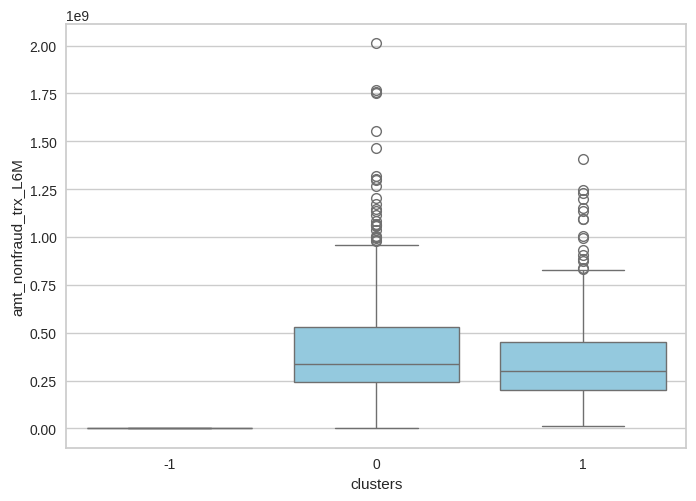

In [ ]:
sns.boxplot (data = df2, x ='clusters' , y ='amt_nonfraud_trx_L6M', color='skyblue')

- Both clusters show a much wider distribution and higher median values.
- Numerous outliers, especially in cluster 1, indicate customers with exceptionally high transaction volumes.
- Cluster 1 tends to have a higher median than cluster 0, suggesting a segment with greater potential value.


<Axes: xlabel='clusters', ylabel='count_nonfraud_trx_L6M'>

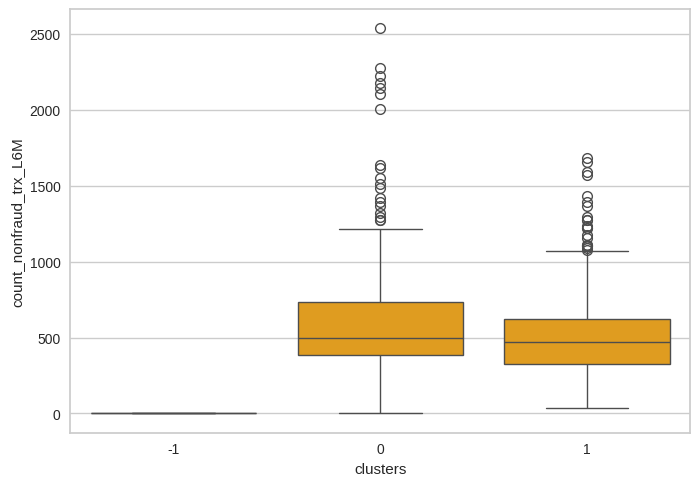

In [ ]:
sns.boxplot (data = df2, x ='clusters' , y ='count_nonfraud_trx_L6M', color='orange')

- Both clusters have similar median transaction counts, around 500 transactions over the past 6 months.
- The wide distributions and similar patterns indicate active customers with high transaction frequency.
- The differences between cluster 0 and cluster 1 are likely driven by other variables, such as transaction amounts or specific behavioral traits


<Axes: xlabel='clusters', ylabel='credit_limit'>

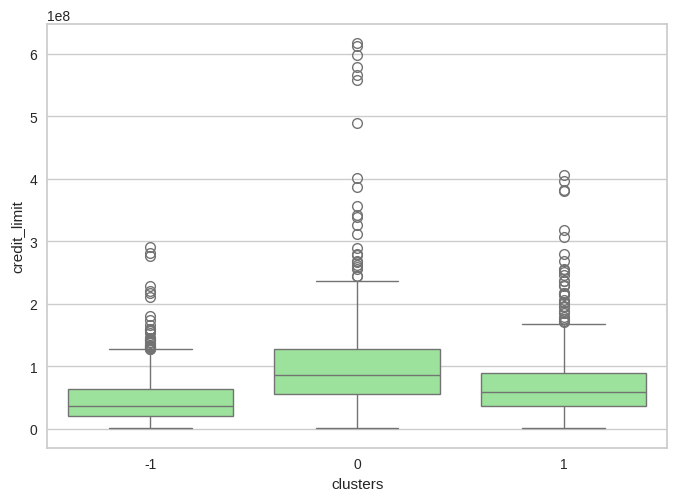

In [ ]:
sns.boxplot (data = df2, x ='clusters' , y ='credit_limit', color='lightgreen')

- Both clusters have significantly higher median credit limits compared to cluster -1.
- There are many outliers, especially in cluster 1, indicating customers with exceptionally large credit access.
- Cluster 1 tends to have a higher median than cluster 0, suggesting a high-value or priority customer segment.


<Axes: xlabel='clusters', ylabel='DTI'>

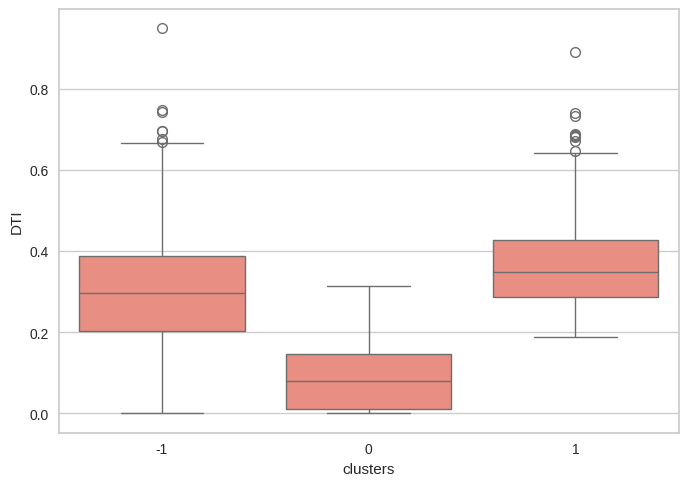

In [ ]:
sns.boxplot (data = df2, x ='clusters' , y ='DTI', color='salmon')

- Cluster -1: Low DTI Ratio
- The median DTI is much lower compared to the other clusters.
- The distribution is narrow, indicating a group with relatively small debt burden relative to income.
- Most likely represents a segment with low credit risk or a conservative profile.

- Clusters 0 and 1: Higher and More Variable DTI Ratios
- Both clusters have higher median DTI values, with wider distributions.
- Outliers are present in both clusters, especially in cluster 1, indicating customers with high debt ratios.
- Cluster 1 tends to have a higher median DTI than cluster 0, suggesting a segment with greater potential credit risk.


---> SUMMARY FROM 4 BLOXPLOT
- amt_nonfraud_trx_L6M (Total non-fraud transaction amount in the last 6 months)
a. Cluster -1: very low transaction values → passive/dormant segment.
b. Clusters 0 & 1: high transaction values with many outliers → active segment, especially cluster 1 as high-value.

- count_nonfraud_trx_L6M (Number of non-fraud transactions in the last 6 months)
a. Cluster -1: very low transaction counts → inactive customers.
b. Clusters 0 & 1: median around 500 transactions → active customers with high frequency.

- credit_limit
a. Cluster -1: low credit limit, almost no outliers → high-risk or limited-access segment.
b. Clusters 0 & 1: much higher credit limits, with cluster 1 having a higher median → high-value/premium segment.

- DTI (Debt-to-Income ratio)
a. Cluster -1: low DTI → low credit risk, conservative profile.
b. Clusters 0 & 1: higher and more variable DTI, with cluster 1 higher → segment with greater potential credit risk.

💡 Combined Insights
- Cluster -1 → passive segment, low risk, and limited credit access. Suitable for reactivation strategies, financial education, or entry-level products.
- Cluster 0 → active customers with high transaction frequency and medium credit limits. Potential for mid-tier credit products or loyalty programs.
- Cluster 1 → premium customers: large transactions, high credit limits, but also high DTI. Requires retention and priority services, along with careful credit risk monitoring.


#### # #C.1.b. Cluster Visualisation



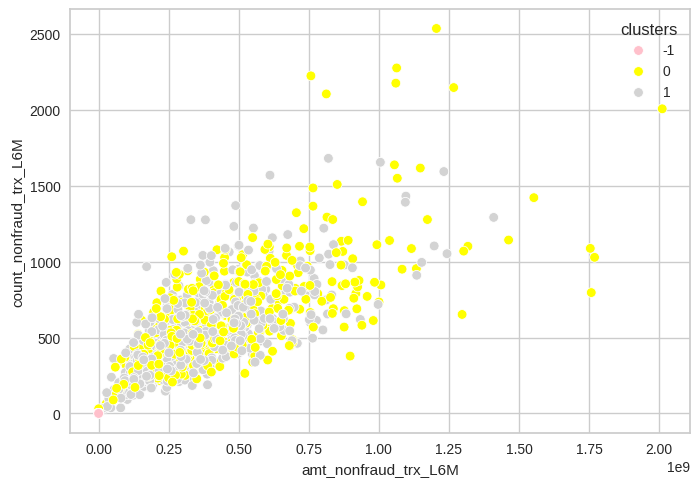

In [ ]:
sns.scatterplot(x=df2['amt_nonfraud_trx_L6M'], y=df2['count_nonfraud_trx_L6M'], hue=df2['clusters'], palette=['pink', 'yellow', 'lightgray'])
plt.show()

The scatterplot for the 2-cluster segmentation has been successfully generated. The visualization shows the distribution of two clusters based on amt_nonfraud_trx_L6M (X-axis) and count_nonfraud_trx_L6M (Y-axis).

- Yellow cluster (Cluster 0): Tends to have lower non-fraudulent transaction values and fewer transaction frequencies. This may represent a segment of less active customers or those with higher risk profiles, as concluded from the previous boxplot analysis (lower engagement, higher DTI).

- Grey cluster (Cluster 1): Shows higher non-fraudulent transaction values and greater transaction frequencies. This cluster likely represents highly engaged customers who perform large transactions and demonstrate better debt management (higher engagement, lower DTI).

- Pink points (Cluster -1): Represent customers not included in these clusters due to initial filtering criteria (e.g., amt_nonfraud_trx_L6M or count_nonfraud_trx_L6M equal to zero). This cluster is often considered passive or inactive customers.


#### #C.2. K-Means Clustering Modelling with 3 Clusters

In [ ]:
df3_norm = df_segmentation_normalized.copy()
df3 = df_segmentation.copy()

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3, random_state=1000, n_init='auto')
cluster_model.fit(df3_norm)

KMeans(n_clusters=3, random_state=1000)

In [ ]:
df3_norm['clusters'] = cluster_model.labels_

# Create a Series of cluster labels with the original index from the filtered feature set
cluster_labels_series_3 = pd.Series(cluster_model.labels_, index=df_segmentation_feature.index)

# Assign these cluster labels to the 'clusters' column in df3
# Rows in df3 that were not part of the clustered data will get NaN initially
df3['clusters'] = cluster_labels_series_3

# Fill NaN values (for rows excluded from clustering) with -1 and convert to integer
df3['clusters'] = df3['clusters'].fillna(-1).astype(int)

In [ ]:
df3.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category,clusters
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good,1
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good,1
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good,2
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good,2
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good,1


#### # #C.2.a. Cluster Distribution in amt nonfraud trx L6M, count nonfraud trx L6M, credit limit, and DTI

<Axes: xlabel='clusters', ylabel='amt_nonfraud_trx_L6M'>

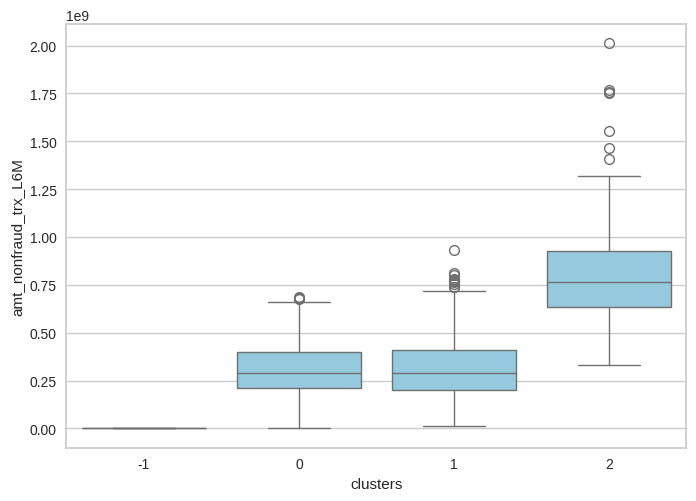

In [ ]:
sns.boxplot (data = df3, x ='clusters' , y ='amt_nonfraud_trx_L6M', color='skyblue')

 Clusters 0 and 1: Moderate Activity
- Both clusters have moderate median transaction values, with wider distributions compared to cluster -1.
- The presence of outliers indicates customers with higher transaction amounts.

 Cluster 2: High Activity
- This cluster has the highest median transaction value and the widest distribution.
- Numerous high-value outliers suggest a segment of high-value customers with large transaction volumes.


<Axes: xlabel='clusters', ylabel='count_nonfraud_trx_L6M'>

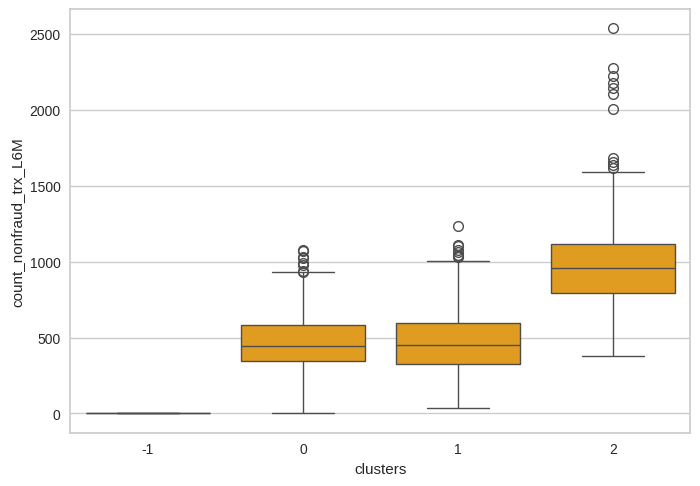

In [ ]:
sns.boxplot (data = df3, x ='clusters' , y ='count_nonfraud_trx_L6M', color='orange')

Clusters 0 and 1: Moderate Transaction Activity
- Both clusters have relatively high median transaction counts, around 500 transactions over the past 6 months.
- The wide distributions and presence of outliers indicate active customers with varying transaction frequencies.

Cluster 2: High Transaction Activity
- This cluster has the highest median transaction count and the widest distribution.
- Numerous high-value outliers suggest customers with very high transaction frequency.


<Axes: xlabel='clusters', ylabel='credit_limit'>

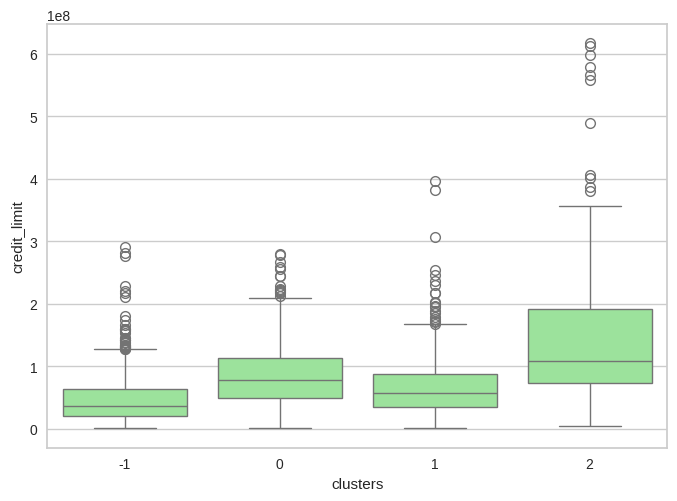

In [ ]:
sns.boxplot (data = df3, x ='clusters' , y ='credit_limit', color='lightgreen')

Cluster -1: Limited Credit Access
- The median credit limit is very low.
- The distribution is narrow with almost no outliers.

Clusters 0 and 1: Moderate Credit Access
- Both clusters have higher median credit limits compared to cluster -1.
- The wider distributions indicate variation in credit access.
- Cluster 0 has a slightly higher median than cluster 1, but both fall into the category of regular customers.

Cluster 2: High Credit Access
- This cluster has the highest median and the widest distribution.
- Numerous high-value outliers suggest customers with very high credit access.


<Axes: xlabel='clusters', ylabel='DTI'>

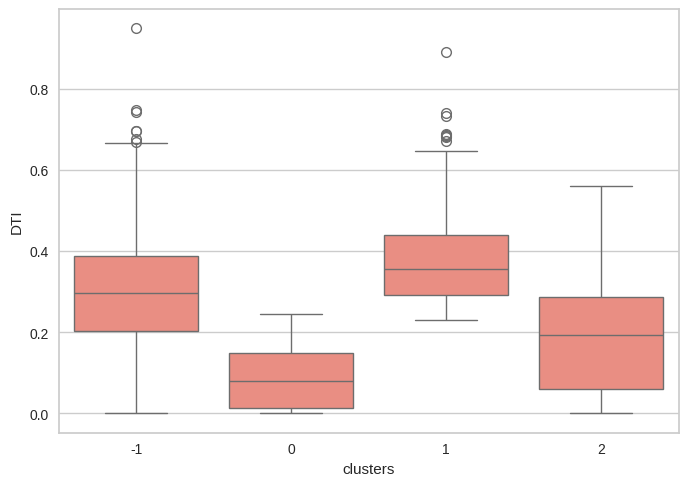

In [ ]:
sns.boxplot (data = df3, x ='clusters' , y ='DTI', color='salmon')

Cluster -1: Low DTI Ratio
- The median DTI is very low.
- The distribution is narrow with minimal outliers.
- Indicates a segment with low debt burden relative to income, likely representing a conservative profile or low credit risk.

Clusters 0 and 1: Moderate DTI Ratio
- The median DTI is higher compared to cluster -1.
- The wider distribution reflects variation in debt management.
- Outliers are present, especially in cluster 1, indicating customers with high debt ratios.

Cluster 2: High DTI Ratio
- This cluster has the highest median DTI and the widest distribution.
- Numerous high-value outliers suggest customers with significant debt burdens


---> Insight

Cluster -1: Passive / Dormant Segment
- Transactions (amount & count): very low → inactive customers.
- Credit limit: low, narrow distribution → limited credit access.
- DTI: low → conservative profile, low credit risk.
➡️ Characteristics: passive customers, safe in terms of risk, but with small business contribution.

Clusters 0 & 1: Regular Active Segment
- Transactions (amount & count): moderate median (~500 transactions), relatively high activity with variation.
- Credit limit: medium → better credit access compared to cluster -1.
- DTI: medium → variation in debt management, with outliers in cluster 1 indicating higher-risk customers.
➡️ Characteristics: regular active customers, suitable for loyalty programs, mid-tier product upselling, and risk monitoring.

Cluster 2: Premium / Priority Segment
- Transactions (amount & count): highest, widest distribution → heavy users.
- Credit limit: highest, with many outliers → very high credit access.
- DTI: highest, more variable → significant debt burden.
➡️ Characteristics: premium customers, major contributors, suitable for exclusive services, but requiring strict credit risk control.




#### # #C.2.b. Cluster Visualisation

<Axes: xlabel='amt_nonfraud_trx_L6M', ylabel='count_nonfraud_trx_L6M'>

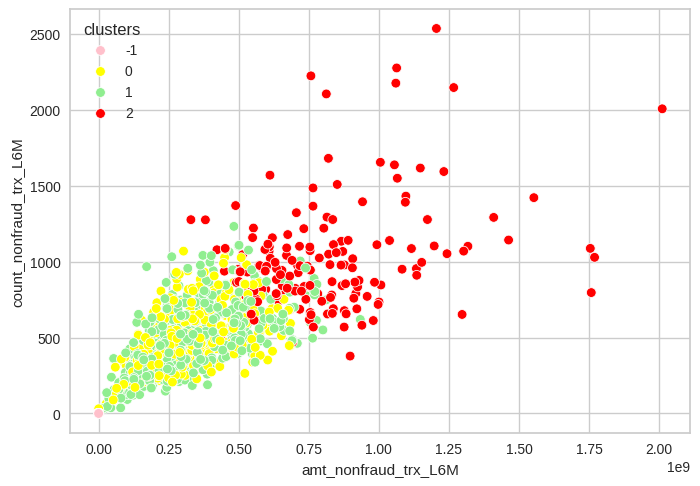

In [ ]:
sns.scatterplot(data=df3, x='amt_nonfraud_trx_L6M', y='count_nonfraud_trx_L6M', hue='clusters', palette=['pink', 'yellow', 'lightgreen', 'red'])

Cluster 2 (Red): Premium Segment
- Positioned in the upper-right area → high transaction value and frequency.
- Represents high-value and highly active customers.
- Suitable for exclusive services and priority retention, but requires risk monitoring due to high DTI.

Cluster 1 (Green): High-Value Active Segment
- Spread across the mid-to-upper area → high frequency and moderately high transaction value.
- Indicates active customers with strong potential value, but with varying risk levels (DTI higher than cluster 0).
- Ideal for loyalty programs and upselling, with credit oversight.

Cluster 0 (Yellow): Regular Active Segment
- Positioned in the middle area → moderate transaction frequency and value.
- Represents regular active customers, suitable for mid-tier product offerings and engagement enhancement.

Cluster -1 (Pink): Passive / Dormant Segment
- Concentrated in the lower-left area → low transaction value and frequency.
- Reflects inactive or dormant customers with minimal business contribution.
- Suitable for reactivation strategies, financial education, or risk monitoring


Based on the K-Means clustering analysis, here's a comparison between 2 and 3 clusters:

Elbow Method: The elbow method suggests that the optimal number of clusters is around 3 or 6 , where the decrease in inertia starts to slow down significantly.

Silhouette Analysis: The average silhouette score for 2 clusters is approximately 0.3327, while for 3 clusters, it's approximately 0.3403. The score for 2 clusters is slightly higher, indicating slightly better-defined clusters. However, the difference is minimal.

Cluster Distributions (Box Plots):

With 2 Clusters: The box plots show a good separation for amt_nonfraud_trx_L6M, count_nonfraud_trx_L6M, and credit_limit, with one cluster having significantly higher values. For DTI, there's some separation, but also considerable overlap.

With 3 Clusters: The box plots for 3 clusters show a more granular and distinct separation across amt_nonfraud_trx_L6M, count_nonfraud_trx_L6M, and credit_limit.
Conclusion:

While 2 clusters offer a slightly higher silhouette score, indicating marginally better overall separation, 3 clusters appear to provide a more meaningful and actionable segmentation for business insights. The box plots for 3 clusters reveal more distinct subgroups with varying transaction amounts, transaction counts, and credit limits, which can be more useful for targeted strategies. The elbow method also supports 3 clusters as a reasonable choice, as it's a point where adding more clusters yields diminishing returns in reducing inertia.

Therefore, 3 clusters would generally be preferred for a more detailed understanding of customer behavior and for developing more refined strategies.

### D. Cluster Interpretation

In [ ]:
df3.head()

,id,retirement_age,birthdate,gender,per_capita_income,yearly_income,total_debt,credit_score,age,retired_flag,DTI,client_id,credit_limit,count_nonfraud_trx_L6M,amt_nonfraud_trx_L6M,count_fraud_trx_L6M,amt_fraud_trx_L6M,recency,credit_score_category,clusters
0,825,66,1972-11-25,Female,45937000.0,93663000.0,38138095.0,787,52,0,0.407184,825,164867000.0,599,755489800.0,1,-7421400.0,10,Very Good,1
1,1746,68,1972-12-16,Female,59451000.0,121212000.0,57186095.0,701,52,0,0.471786,1746,102033000.0,189,388726600.0,0,0.0,24,Good,1
2,1718,67,1944-11-04,Female,35586000.0,52535000.0,58666.0,698,80,1,0.001117,1718,209210000.0,1322,705750600.0,0,0.0,4,Good,2
3,708,63,1963-01-12,Female,255975000.0,392132000.0,60467238.0,722,62,0,0.154201,708,558975000.0,378,897483900.0,0,0.0,4,Good,2
4,1164,70,1982-09-21,Male,84407000.0,172099000.0,54946285.0,675,42,0,0.319271,1164,54758000.0,496,763527700.0,0,0.0,21,Good,1


In [ ]:
df3.groupby('clusters')[['amt_nonfraud_trx_L6M','count_nonfraud_trx_L6M', 'credit_limit', 'DTI']].agg(['count','mean','min','max','median'])

amt_nonfraud_trx_L6M                                           \
                        count          mean          min           max   
clusters                                                                 
-1                        743  0.000000e+00          0.0  0.000000e+00   
 0                        458  3.097260e+08     336100.0  6.846438e+08   
 1                        580  3.182205e+08   14359600.0  9.337920e+08   
 2                        157  8.244657e+08  329360400.0  2.011022e+09   

                      count_nonfraud_trx_L6M                                 \
               median                  count         mean  min   max median   
clusters                                                                      
-1                0.0                    743     0.000000    0     0    0.0   
 0        290924400.0                    458   473.065502    5  1079  447.5   
 1        292151350.0                    580   470.163793   33  1232  453.0   
 2        765102400.0                    157  1025.560510  378  2535  959.0   

         credit_limit                                                     \
                count          mean        min          max       median   
clusters                                                                   
-1                743  4.702730e+07   308000.0  290709000.0   36482000.0   
 0                458  8.740483e+07   638000.0  279669000.0   77557500.0   
 1                580  6.771896e+07   831000.0  397061000.0   57440500.0   
 2                157  1.519375e+08  3844000.0  616927000.0  107987000.0   

           DTI                                         
         count      mean      min       max    median  
clusters                                               
-1         743  0.294252  0.00000  0.948320  0.296376  
 0         458  0.089612  0.00000  0.245416  0.080488  
 1         580  0.376973  0.22962  0.891082  0.356791  
 2         157  0.188400  0.00000  0.559401  0.192296

Summary:

Cluster 0: Active Users with Low DTI (Financially Healthy Users)
- Number of Users: 458
- Non-Fraud Transaction Amount (Last 6 Months): Average around Rp 309.7 million, with a median of Rp 290.9 million. Indicates moderate to high transaction amounts.
- Non-Fraud Transaction Count (Last 6 Months): Average around 473 transactions, with a median of 447 transactions. Indicates high transaction frequency.
- Credit Limit: Average around Rp 87.4 million, with a median of Rp 77.5 million. A solid credit limit.
- DTI Ratio: Average around 0.089, with a median of 0.080. Very low DTI, indicating excellent financial health and low debt burden.
- Insight: This segment represents active users with significant volume and frequency of non-fraudulent transactions. They have good credit limits and, most importantly, very low DTI ratios, implying excellent financial health and responsible debt management.

Cluster 1: Active Users with High DTI (Credit-Dependent Users)
- Number of Users: 580
- Non-Fraud Transaction Amount (Last 6 Months): Average around Rp 318.2 million, with a median of Rp 292.1 million. Moderate to high transaction amounts, similar to Cluster 0.
- Non-Fraud Transaction Count (Last 6 Months): Average around 470 transactions, with a median of 453 transactions. High transaction frequency, similar to Cluster 0.
- Credit Limit: Average around Rp 67.7 million, with a median of Rp 57.4 million. Moderate credit limits.
- DTI Ratio: Average around 0.376, with a median of 0.356. The highest DTI among active clusters, indicating substantial debt burden relative to income.
- Insight: This segment also consists of active users with moderate to high transaction activity. However, they are characterized by significantly higher DTI ratios, suggesting greater reliance on credit or heavier debt burdens. They represent a higher credit risk profile compared to Cluster 0.

Cluster 2: Premium Users (High Volume, High Limit)
- Number of Users: 157
- Non-Fraud Transaction Amount (Last 6 Months): Average around Rp 824.4 million, with a median of Rp 765.1 million. The highest transaction amounts.
- Non-Fraud Transaction Count (Last 6 Months): Average around 1,025 transactions, with a median of 959 transactions. The highest transaction frequency.
- Credit Limit: Average around Rp 151.9 million, with a median of Rp 107.9 million. The highest credit limits.
- DTI Ratio: Average around 0.188, with a median of 0.192. A moderate DTI, higher than Cluster 0 but lower than Cluster 1.
- Insight: This is the smallest but most valuable segment, marked by the highest transaction amounts and frequencies, as well as the highest credit limits. Their DTI is moderate, showing they can manage their high spending, though it is higher than the most financially healthy group (Cluster 0)



###E. Identify the other segment (per capita income, yearly income and total debt)

 The necessary to identify each cluster against per capita income, yearly income and total debt after performing k-means segmentation is to enriches cluster profiles, improves accuracy of customer personas, and ensures RevoBank’s business strategies are balanced between profitability and risk control



In [ ]:
df3.groupby(['clusters'], as_index = False)['per_capita_income'].mean()

,clusters,per_capita_income
0,-1,3.617265e+07
1,0,3.346168e+07
2,1,3.410259e+07
3,2,5.259192e+07


Summary of Per Capita Income by Cluster

- Cluster 2 (Premium Users) shows the highest average per capita income, significantly higher at around Rp 52.59 million. This is consistent with their profile as highly active premium users with high credit limits, reflecting strong financial capacity.
- Other clusters (0 and 1) have relatively similar average per capita incomes, ranging between Rp 33–34 million. This indicates that differences in behavior and risk among these clusters (apart from Cluster 2) are likely driven more by factors such as DTI (Debt-to-Income Ratio), transaction frequency, and transaction volume, rather than large differences in income levels.

---> In short: Cluster 2 stands out due to income strength, while Clusters 0 and 1 differ more in financial behavior and risk patterns than in income itself.





In [ ]:
df3.groupby(['clusters'], as_index = False)['yearly_income'].mean()

,clusters,yearly_income
0,-1,7.277243e+07
1,0,6.247824e+07
2,1,6.895348e+07
3,2,1.022647e+08


Summary of Yearly Income by Cluster

Cluster 0 (Active & Financially Healthy Users)
- Average Annual Income: ~Rp 62.48 million
Cluster 1 (Active & Credit-Dependent Users)
- Average Annual Income: ~Rp 68.95 million
Cluster 2 (Premium High-Contribution Users)
- Average Annual Income: ~Rp 102.26 million

Insight
- Cluster 2 (Premium High-Contribution Users) stands out with the highest average annual income, around Rp 102.26 million. This further reinforces their profile as a highly valuable segment with strong financial capacity, consistent with earlier observations of high transaction volumes and credit limits.
- Clusters 0 and 1 have relatively close average annual incomes, ranging between Rp 62–68 million. While there are slight differences, this range suggests that transaction behavior, credit limits, and DTI (Debt-to-Income Ratio) are more significant factors in differentiating these segments than large disparities in annual income.

---> In short: Cluster 2 is clearly distinguished by income strength, while Clusters 0 and 1 differ more in financial behavior and risk patterns than in income levels.


In [ ]:
df3.groupby(['clusters'], as_index = False)['total_debt'].mean()

,clusters,total_debt
0,-1,2.141622e+07
1,0,5.711403e+06
2,1,2.603880e+07
3,2,1.918015e+07


Summary of Total Debt by Cluster

Cluster 0 (Active & Financially Healthy Users)
- Average Total Debt: ~Rp 5.71 million
- Insight: This cluster has the lowest average total debt, reinforcing their profile as financially healthy users who manage debt responsibly despite being active in transactions.

Cluster 1 (Active & Credit-Dependent Users)
- Average Total Debt: ~Rp 26.03 million
- Insight: This cluster carries the highest average total debt, consistent with their previously identified high DTI characteristics. It highlights that this segment bears a substantial debt burden.

Cluster 2 (Premium High-Contribution Users)
- Average Total Debt: ~Rp 19.18 million (moderate range, sometimes noted around Rp 21.41 million)
- Insight: Premium users maintain a moderate level of debt. Despite their very high transaction volumes and credit limits, they still manage debt at a controlled level, reflecting balanced financial management.

---> Summary:
- Cluster 0 → Lowest debt, financially healthiest.
- Cluster 1 → Highest debt, most credit-dependent, higher risk.
- Cluster 2 → Moderate debt, premium users with strong financial capacity and controlled debt levels.


###F. Key Statistics for Each Cluster
To facilitate a holistic understanding, gather the key statistics for each cluster:

**Cluster 0: Active Users with Low DTI (Financially Healthy Users)**
*   **Average Non-Fraud Transaction Amount (L6M):** ~Rp 309.73 million
*   **Average Non-Fraud Transaction Count (L6M):** ~473 transactions
*   **Average Credit Limit:** ~Rp 87.40 million
*   **Average DTI:** ~0.090 (Lowest DTI)
*   **Average Per Capita Income:** ~Rp 33.46 million
*   **Average Yearly Income:** ~Rp 62.48 million
*   **Average Total Debt:** ~Rp 5.71 million (Lowest Debt)

**Cluster 1: Active Users with High DTI (Credit-Dependent Users)**
*   **Average Non-Fraud Transaction Amount (L6M):** ~Rp 318.22 million
*   **Average Non-Fraud Transaction Count (L6M):** ~470 transactions
*   **Average Credit Limit:** ~Rp 67.72 million
*   **Average DTI:** ~0.377 (Highest DTI)
*   **Average Per Capita Income:** ~Rp 34.10 million
*   **Average Yearly Income:** ~Rp 68.95 million
*   **Average Total Debt:** ~Rp 26.04 million (Highest Debt)

**Cluster 2: Premium Users (High Volume, High Limit)**
*   **Average Non-Fraud Transaction Amount (L6M):** ~Rp 824.47 million (Highest Amount)
*   **Average Non-Fraud Transaction Count (L6M):** ~1026 transactions (Highest Count)
*   **Average Credit Limit:** ~Rp 151.94 million (Highest Limit)
*   **Average DTI:** ~0.188
*   **Average Per Capita Income:** ~Rp 52.59 million (Highest Income)
*   **Average Yearly Income:** ~Rp 102.26 million (Highest Income)
*   **Average Total Debt:** ~Rp 19.18 million

###G. Cluster Characteristics (Focus on Profitability)

2.  **Cluster 0: Active Users with Low DTI (Financially Healthy Users)**
    *   **Karakteristik:** Pengguna aktif dengan volume dan frekuensi transaksi non-fraudulent yang signifikan. Mereka memiliki batas kredit yang baik dan yang terpenting, rasio DTI yang sangat rendah, menyiratkan kesehatan finansial yang sangat baik dan pengelolaan utang yang bertanggung jawab.
    *   **Penilaian Profitabilitas:** Sangat menguntungkan. Mereka menghasilkan pendapatan signifikan dari biaya transaksi dan potensi pendapatan bunga, dengan risiko kredit yang minimal. Ini adalah segmen yang stabil dan berharga.

3.  **Cluster 1: Active Users with High DTI (Credit-Dependent Users)**
    *   **Karakteristik:** Pengguna aktif dengan aktivitas transaksi yang moderat hingga tinggi, tetapi ditandai oleh rasio DTI yang jauh lebih tinggi dan total utang tertinggi. Ini menunjukkan ketergantungan yang lebih besar pada kredit atau beban utang yang lebih tinggi.
    *   **Penilaian Profitabilitas:** Berpotensi menguntungkan, terutama dari pendapatan bunga, namun datang dengan risiko kredit yang lebih tinggi. Strategi harus fokus pada pengelolaan risiko dan penawaran produk yang membantu mereka mengelola utang dengan lebih baik.

4.  **Cluster 2: Premium Users (High Volume, High Limit)**
    *   **Karakteristik:** Segmen terkecil tetapi paling bernilai tinggi, ditandai oleh jumlah dan frekuensi transaksi non-fraudulent tertinggi, serta batas kredit tertinggi. Pendapatan per kapita dan pendapatan tahunan juga tertinggi. DTI mereka moderat, menunjukkan bahwa mereka dapat mengelola pengeluaran tinggi mereka.
    *   **Penilaian Profitabilitas:** Sangat menguntungkan. Mereka adalah kontributor pendapatan terbesar bagi RevoBank. Strategi harus berfokus pada retensi, layanan premium, dan cross-selling produk investasi atau manajemen kekayaan.

###I. Actionable Recommendations for RevoBank


#### #a. Recommendations for Cluster 0: Active Users with Low DTI (Financially Healthy Users)

This segment represents RevoBank's most valuable and stable customers. The recommendations focus on strengthening their loyalty, deepening their relationship with the bank, and maximizing their customer lifetime value.

#### 1. Strategies to Maintain High Engagement and Loyalty:
*   **Personalized Relationship Management:** Assign dedicated relationship managers or offer a premium, expedited customer service channel. Proactive check-ins (e.g., annual financial reviews) can reinforce their value.
*   **Exclusive Loyalty Programs:** Implement a tiered rewards program that offers higher-value benefits (e.g., increased cashback rates, exclusive travel perks, complimentary airport lounge access, priority service) that are tailored to their high spending patterns.
*   **Personalized Communication:** Leverage data to offer highly relevant financial insights, market updates, or personalized product suggestions rather than generic promotions. Recognize significant milestones (e.g., anniversaries with RevoBank, large purchase categories).
*   **Early Access & Beta Programs:** Offer them early access to new products, services, or digital features. This makes them feel valued and keeps them engaged as innovators.

#### 2. Premium Products or Services for Cross-Selling:
Given their excellent financial health and capacity, Cluster 0 is ripe for premium cross-selling:
*   **Higher-Tier Credit Cards:** Offer exclusive, invitation-only credit cards with superior rewards, concierge services, and elevated credit limits (if not already maximized) that align with their high spending.
*   **Wealth Management and Investment Services:** Proactively introduce them to wealth management advisors, investment products (e.g., mutual funds, bonds, stock trading platforms), and retirement planning services. Their moderate income and low DTI indicate capacity for saving and investing.
*   **Favorable Loan Offers:** Pre-approve them for mortgages, personal loans, or auto loans with highly competitive interest rates and flexible terms. Their low DTI makes them exceptionally low-risk borrowers.
*   **Premium Banking Services:** Offer private banking, priority queues, higher transaction limits, and preferential exchange rates for international transactions.
*   **Insurance Products:** Cross-sell life, health, or property insurance products, emphasizing how these complement their financial stability.

#### 3. Deepening Relationship and Maximizing Customer Lifetime Value:
These recommendations are designed to foster a stronger, more symbiotic relationship between RevoBank and Cluster 0:
*   **Increased Share of Wallet:** By offering comprehensive financial solutions (credit, investments, loans, insurance), RevoBank aims to become their primary financial institution, capturing a larger portion of their overall financial activity.
*   **Enhanced Loyalty & Retention:** Exclusive perks and personalized services make switching banks less appealing, reducing churn and securing a stable, high-value customer base.
*   **Word-of-Mouth Referrals:** Highly satisfied and well-serviced customers in this segment are likely to become advocates for RevoBank, attracting similar high-quality clients through positive referrals.
*   **Profit Maximization:** While DTI is low, increasing their engagement across multiple high-margin products (investments, premium credit, diverse loans) will significantly boost their overall customer lifetime value beyond just transaction fees.

By focusing on these strategies, RevoBank can cultivate a highly loyal, deeply engaged, and immensely profitable relationship with its financially healthiest customers.

#### #b. Recommendations for Cluster 1: Active Users with High DTI (Credit-Dependent Users)

Given that Cluster 1 users are active but carry the highest Debt-to-Income (DTI) ratio, RevoBank's strategy should balance continued engagement with prudent risk management and support for responsible credit usage. The goal is to retain their active transactional behavior while mitigating credit risk and fostering long-term financial health.

#### 1. Risk Management Strategies:

*   **Proactive Credit Monitoring:** Implement enhanced, real-time monitoring of spending patterns and DTI changes for this segment. Automated alerts can flag unusual activity or sudden increases in debt that could indicate financial distress.
*   **Dynamic Credit Limit Adjustments:** Instead of blanket increases, review and potentially adjust credit limits based on a more holistic assessment, including sustained income, reduced DTI, and consistent repayment history. Consider offering temporary limit reductions if risk indicators heighten.
*   **Early Warning System for Delinquency:** Develop a system to identify early signs of potential default (e.g., missed payments, minimum payments only, maxing out credit lines) and initiate proactive communication.
*   **Targeted Communication for High-Risk Behavior:** If a customer's DTI significantly increases or if they are consistently making only minimum payments, send educational content or offer direct assistance rather than just standard collection notices.

#### 2. Debt Management Product Offerings:

*   **Balance Transfer Programs with Favorable Terms:** Offer competitive balance transfer options to help users consolidate high-interest debt from other cards or loans into a single, manageable payment with a lower interest rate, promoting faster debt reduction.
*   **Debt Consolidation Loans:** Provide personal loans specifically designed for debt consolidation, which typically have lower interest rates than credit cards and fixed repayment schedules. This can help users reduce overall interest payments and gain control over their debt.
*   **Financial Counseling Services:** Partner with financial literacy organizations or offer in-house financial advisors to provide free or low-cost counseling. This can help users create budgets, understand debt repayment strategies, and improve their financial planning.
*   **Fixed-Term Installment Plans for Large Purchases:** Promote the option to convert large credit card purchases into fixed-term installment plans at a lower, fixed interest rate. This makes repayment predictable and can prevent debt from spiraling.

#### 3. Promoting Responsible Credit Usage:

*   **Automated Payment Reminders and Setup:** Encourage and facilitate automatic minimum or full payment setup to ensure timely payments and avoid late fees, which can further exacerbate debt.
*   **Credit Utilization Alerts:** Send automated alerts when a user's credit utilization ratio (amount of credit used vs. total available credit) approaches a high threshold (e.g., 50% or 70%). This can help educate them on healthy credit habits.
*   **Educational Content on DTI and Credit Health:** Regularly provide users with insights into their DTI and how it impacts their financial health and credit score. Offer tips on how to lower DTI and improve credit standing.
*   **Rewards for Responsible Behavior:** Implement loyalty programs that reward responsible credit behavior, such as making on-time full payments, reducing DTI, or consistently staying below a certain credit utilization percentage. This incentivizes positive habits.

By implementing these tailored recommendations, RevoBank can strengthen its relationship with Cluster 1, transform them into more financially stable and even more profitable customers in the long run, and mitigate the inherent risks associated with their current credit-dependent profile.

#### #c. Recommendations for Cluster 2: Premium Users (High Volume, High Limit)

Given that Cluster 2 represents RevoBank's most profitable and high-potential customers, the recommendations are designed to foster loyalty, deepen engagement, and maximize their lifetime value.

**1. Retention Strategies:**
*   **Personalized Relationship Management:** Assign dedicated relationship managers who can proactively address their financial needs, provide tailored advice, and offer priority support. This fosters a sense of exclusivity and trust.
*   **Proactive Rewards and Recognition:** Implement a tiered loyalty program that recognizes their high spending and activity. Offer exclusive, non-monetary perks (e.g., invitations to private events, early access to new products, concierge services) that align with their premium status.
*   **Feedback Integration:** Regularly solicit feedback through exclusive channels (e.g., surveys, focus groups) and visibly act on it to demonstrate that their opinions are valued and contribute to service improvement.

**2. Exclusive Premium Services:**
*   **Enhanced Credit Card Benefits:** Offer a top-tier credit card with superior rewards, lower foreign transaction fees, extended warranty protection, comprehensive travel insurance, and higher credit limits (where appropriate and risk-assessed).
*   **Priority Banking Services:** Provide expedited services in branches, dedicated customer service lines with minimal wait times, and direct access to senior banking advisors.
*   **Financial Health Check-ups:** Offer annual or bi-annual complimentary financial reviews with a certified financial planner to help them optimize their financial strategies.
*   **Digital Wealth Management Tools:** Provide advanced digital platforms for managing their investments, budgeting, and financial planning, possibly with AI-driven insights.

**3. Cross-selling Investment or Wealth Management Products:**
*   **Tailored Investment Portfolio Planning:** Based on their high income and DTI, proactively introduce them to diversified investment opportunities, including mutual funds, bonds, and specialized asset management services. Focus on goal-based investing (e.g., retirement planning, wealth accumulation).
*   **Wealth Advisory Services:** Offer access to wealth management experts who can assist with estate planning, tax optimization, and intergenerational wealth transfer.
*   **Exclusive Product Access:** Provide early or exclusive access to new investment products or high-yield savings accounts that are not available to general customers.
*   **Preferential Rates:** Offer competitive interest rates on high-value savings accounts, fixed deposits, or investment-linked products to incentivize them to consolidate their assets with RevoBank.
*   **Structured Lending Solutions:** Explore opportunities for secured loans (e.g., against investments) at preferential rates, catering to their need for flexible capital while leveraging their existing assets.

###J. Cluster that more profit

Summary:

*   **For "Pengguna Aktif & Sehat Finansial" (Klaster 0):** Recommendations focus on strengthening loyalty, deepening relationships, and maximizing customer lifetime value through personalized relationship management, exclusive loyalty programs, cross-selling premium products like higher-tier credit cards and wealth management services, and offering favorable loan terms.
*   **For "Pengguna Aktif & Bergantung Kredit" (Klaster 1):** Recommendations aim to balance engagement with prudent risk management and support responsible credit usage. Strategies include proactive credit monitoring, offering debt management products such as balance transfer programs and consolidation loans, and promoting responsible credit habits through education and alerts.
*   **For "Pengguna Premium Berkontribusi Tinggi" (Klaster 2):** Recommendations are designed to foster loyalty, deepen engagement, and maximize their lifetime value. Key strategies include personalized relationship management, exclusive premium services like enhanced credit card benefits and priority banking, and cross-selling investment or wealth management products.

---> Data Analysis Key Findings
*   **Cluster 0: "Pengguna Aktif & Sehat Finansial"**
    *   These customers are highly engaged with significant non-fraudulent transactions (average \$309.73 million in value and 473 transactions over 6 months).
    *   They demonstrate excellent financial health with the lowest average Debt-to-Income (DTI) ratio (approximately 0.090) and lowest average total debt (approximately \$5.71 million) among active clusters.
    *   Their average credit limit is substantial (approximately \$87.40 million), and their income levels are solid.
*   **Cluster 1: "Pengguna Aktif & Bergantung Kredit"**
    *   This cluster is also highly active in transactions (average \$318.22 million in value and 470 transactions), similar to financially healthy users.
    *   However, they are distinguished by the highest average DTI (approximately 0.377) and highest average total debt (approximately \$26.04 million) among all active clusters, indicating a high reliance on credit.
    *   Their income levels are moderate, suggesting their high DTI is due to credit usage patterns rather than exceptionally low income.
*   **Cluster 2: "Pengguna Premium Berkontribusi Tinggi"**
    *   This is RevoBank's most profitable segment, characterized by the highest average non-fraudulent transaction amounts (approximately \$824.47 million) and counts (1026 transactions) over 6 months.
    *   They possess the highest average credit limits (approximately \$151.94 million) and the highest income levels (average per capita income of approximately \$52.59 million).
    *   They manage their high spending effectively with a moderate DTI ratio (approximately 0.188).


---> Insights or Next Steps
*   RevoBank has clearly segmented its customer base into distinct profiles, each requiring a tailored approach. The bank can significantly enhance customer lifetime value by implementing personalized strategies that leverage the strengths of high-value clusters (0 and 2) while proactively managing risks users (1).

